In [2]:
import h5py as h5
import functions as fn
import os
import numpy as np
from matplotlib import pyplot as plt
import sys
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from scipy.signal import find_peaks
from copy import deepcopy
from mpl_toolkits.mplot3d import Axes3D
import subprocess
import shutil

In [6]:
filename = r"C:\Users\anton\Downloads\sigma_scan\dkcoulomb.22.12.sigma.5.45e-04.tau.1\ei.h5"
# if len(sys.argv) >= 2:
#     filename = sys.argv[1]

# Open the HDF5 file in read and write mode

with h5.File(filename, 'r') as file:
    # Dump the content hierarchy
    fn.dump_h5(file)

    # kperp = 0
    # data = file['%05i' % kperp]
    # Select data for corresponding kperp

    # Assuming you want to select data for a specific group within the HDF5 file
    data_group = file['Ceipj']


    # Select the matrix for electrons-electrons collisions
    matrix_ee = np.array(data_group['CeipjT'])
    #matrix_ii = np.array(data_group['Ciipj'])

    #print(file['files']['inputs'][0].decode('utf-8'))

file.close()




> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - rows_eF ('title')
 - rows_eT ('title')
> files
 - inputs ()


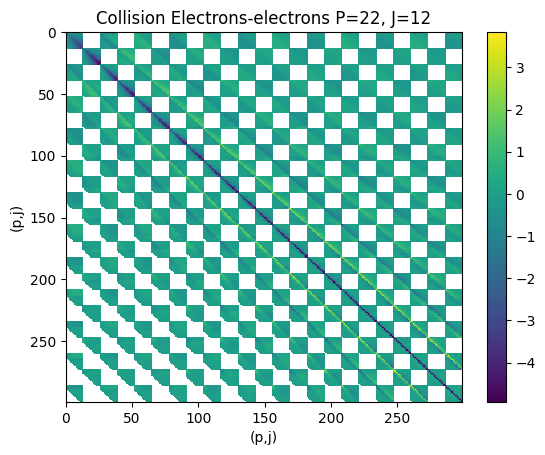

In [7]:
# dims_e = np.array(file['dims_e'])+np.array([1,1])
# dims_i = np.array(file['dims_e'])+np.array([1,1])


# Decimate threshold
# matrix_ee[abs(matrix_ee) <= 0.00] = 0
# matrix_ee[abs(matrix_ee) <= 0.00] = 0

# Compute the correlation matrix
# correlation_matrix_ee = np.corrcoef(matrix_ee)
# correlation_matrix_ee = np.corrcoef(matrix_ee)

# correlation_matrix_ee[abs(matrix_ee) <= 0.00] = np.nan
# correlation_matrix_ee[abs(matrix_ee) <= 0.00] = np.nan


plt.figure()
A = deepcopy(matrix_ee)
A[abs(A)<=0.0] = np.nan
plt.pcolor(A)
plt.title('Collision Electrons-electrons P=22, J=12')# % (dims_e[0],dims_e[1]))
plt.xlabel('(p,j)')
plt.ylabel('(p,j)')
plt.gca().invert_yaxis()
plt.colorbar()

# plt.figure()
# B = deepcopy(matrix_ii)
# B[abs(B)<=0.0] = np.nan
# plt.pcolor(B)
# plt.title('Collision Ions-ions P=%i, J=%i')# % (dims_i[0],dims_i[1]))
# plt.xlabel('(p,j)')
# plt.ylabel('(p,j)')
# plt.gca().invert_yaxis()
# plt.colorbar()

# plt.show()


In [ ]:
# rank = 63

# sparse_matrix_ee = csr_matrix(matrix_ee)
# #sparse_matrix_ee = csr_matrix(matrix_ee)
# svd_ee = TruncatedSVD(n_components=rank)
# svd_ii = TruncatedSVD(n_components=rank)
# approximated_matrix_ee = svd_ee.fit_transform(sparse_matrix_ee)
# #approximated_matrix_ee = svd_ii.fit_transform(sparse_matrix_ee)
# approximated_matrix_ee[abs(approximated_matrix_ee) <= 0.05] = np.nan
# #approximated_matrix_ee[abs(approximated_matrix_ee) <= 0.05] = np.nan
# print(np.linalg.matrix_rank(matrix_ee))
# print(np.linalg.matrix_rank(matrix_ee))
# U, Sigma1, VT = np.linalg.svd(matrix_ee)
# U, Sigma2, VT = np.linalg.svd(matrix_ee)
# print(Sigma1)
# print(Sigma2)

# plt.figure()
# plt.pcolor(approximated_matrix_ee)
# plt.title('Collision Ions-ions P=%i, J=%i' % (dims_i[0],dims_i[1]))
# plt.xlabel('(p,j)')
# plt.ylabel('(p,j)')
# plt.gca().invert_yaxis()
# plt.colorbar()

# plt.figure()
# plt.pcolor(approximated_matrix_ee)
# plt.title('Collision Ions-ions P=%i, J=%i' % (dims_i[0],dims_i[1]))
# plt.xlabel('(p,j)')
# plt.ylabel('(p,j)')
# plt.gca().invert_yaxis()
# plt.colorbar()

plt.show()

IndexError: index 143 is out of bounds for axis 1 with size 143

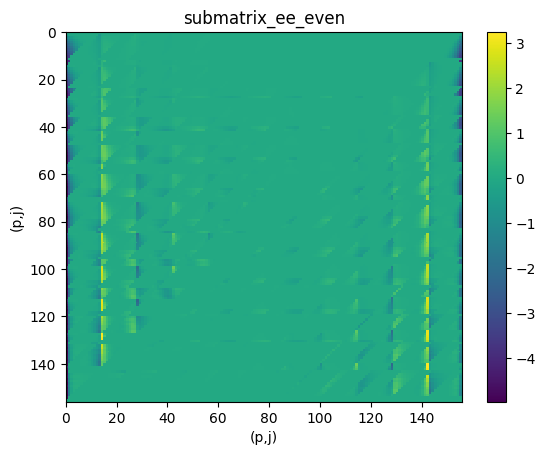

In [69]:
A = np.zeros([156,156])
row = 0
column = 0
for i in range(matrix_ee.shape[0]):
    
    for j in range(matrix_ee.shape[1]):
        
        if np.floor(i/12)%2 == 0 and np.floor(j/12)%2 == 0:
            A[row,column] = matrix_ee[i,j]
            column+=1
            if column == 156:
                row+=1
                column=0
        
#A[abs(A) <= 0.00] = np.nan
plt.figure()
plt.pcolor(A)
plt.title('submatrix_ee_even')
plt.xlabel('(p,j)')
plt.ylabel('(p,j)')
plt.gca().invert_yaxis()
plt.colorbar()


B= np.zeros([143,143])
row = 0
column = 0
for i in range(matrix_ee.shape[0]):
    
    for j in range(matrix_ee.shape[0]):
        if np.floor(i/12)%2 == 1 and np.floor(j/12)%2 == 1:
            B[row,column] = matrix_ee[i,j]
            column+=1
           
            if column == 143:
                
                row+=1
                column=0

#B[abs(B) <= 0.00] = np.nan
plt.figure()
plt.pcolor(B)
plt.title('submatrix_ee_odd' )
plt.xlabel('(p,j)')
plt.ylabel('(p,j)')
plt.gca().invert_yaxis()
plt.colorbar()


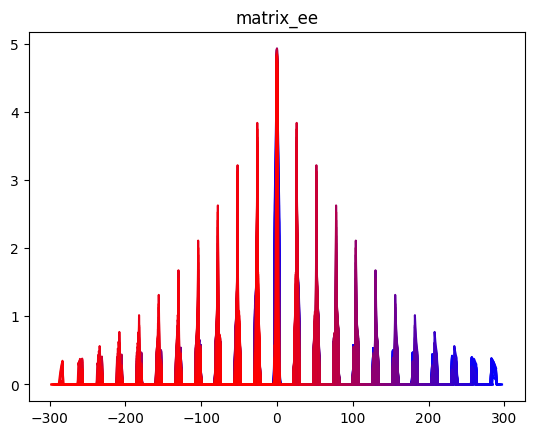

In [8]:
red = np.array([1,0,0])
blue = np.array([0,0,1])

# m = 17 +11*24
# trial_ee = np.zeros(matrix_ee.shape)
# for i in range(matrix_ee.shape[0]):
#     for j in range(matrix_ee.shape[1]):
#         if (abs(i-j)<m) : 
            
#             trial_ee[i,j] = matrix_ee[i,j]

#f = lambda x: 1/np.sqrt(2*np.pi*270)*np.exp(-x**2/(2*270))
for i in range (1, matrix_ee.shape[0]):
    magnitude = np.linalg.norm(abs(matrix_ee[i,:]))
    relevance = abs(matrix_ee[i,:])
    plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i), color = (1-i/matrix_ee.shape[0])*blue + i/matrix_ee.shape[0]*(red))
    plt.title('matrix_ee')
   # plt.legend()
    #plt.plot(np.linspace(-60,60,400), 175*f(np.linspace(-60,60,400)), 'o')
plt.savefig('relevance_ee.eps', format = 'eps')
plt.show()


# for i in range (1, matrix_ee.shape[0]):
#     magnitude = np.linalg.norm(abs(matrix_ee[i,:]))
#     relevance = abs(matrix_ee[i,:]) 
#     plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i), color = (1-i/matrix_ee.shape[0])*blue + i/matrix_ee.shape[0]*(red)
#             )
#     plt.title('matrix_ee')
#     #plt.legend()


# plt.savefig('relevance_ii.eps', format = 'eps')
# plt.show()
#check what are the most meaningful peaks and how the magnitude evolves in function of the row and implement windows size specific to the row, asymmetry of window size and window specific to the row 

> Caapj
 - Ceepj ('ESELF', 'Jmaxe', 'NCPU', 'Pmaxe', 'kperp', 'model', 'neFLR', 'nu', 'system_clock', 'title')
 - rows_e ('title')
> files
 - inputs ()
> Caapj
 - Ceepj ('ESELF', 'Jmaxe', 'NCPU', 'Pmaxe', 'kperp', 'model', 'neFLR', 'nu', 'system_clock', 'title')
 - rows_e ('title')
> files
 - inputs ()


NameError: name 'contour' is not defined

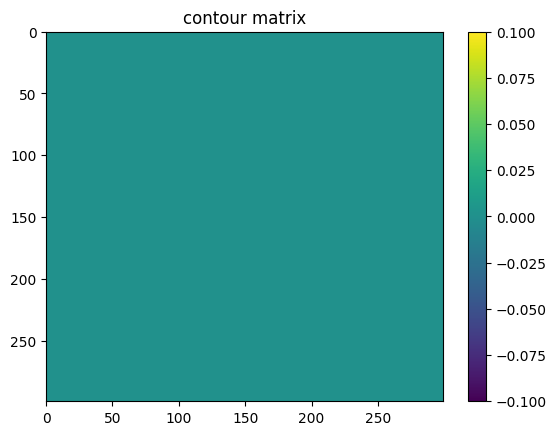

In [3]:
file1 = 'dkcoulomb.22.12.tau\dkcoulomb.22.12.sigma.1.00e+00.tau.1/self.h5'
file2 = 'dkcoulomb.22.12.tau\dkcoulomb.22.12.sigma.1.53e-01.tau.1/self.h5'

with h5.File(file1, 'r') as file:
        fn.dump_h5(file)

        # kperp = 0
        # data = file['%05i' % kperp]
        # Select data for corresponding kperp

        # Assuming you want to select data for a specific group within the HDF5 file
        data_group = file['Caapj']


        # Select the matrix for electrons-electrons collisions
        matrix_ee = np.array(data_group['Ceepj'])

with h5.File(file2, 'r') as file:
        fn.dump_h5(file)

        # kperp = 0
        # data = file['%05i' % kperp]
        # Select data for corresponding kperp

        # Assuming you want to select data for a specific group within the HDF5 file
        data_group = file['Caapj']


        # Select the matrix for electrons-electrons collisions
        matrix_ee_2 = np.array(data_group['Ceepj'])

matrix = matrix_ee - matrix_ee_2

plt.figure()
plt.pcolor(matrix)
plt.title('contour matrix' )
plt.gca().invert_yaxis()
plt.colorbar()

> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - rows_eF ('title')
 - rows_eT ('title')
> files
 - inputs ()


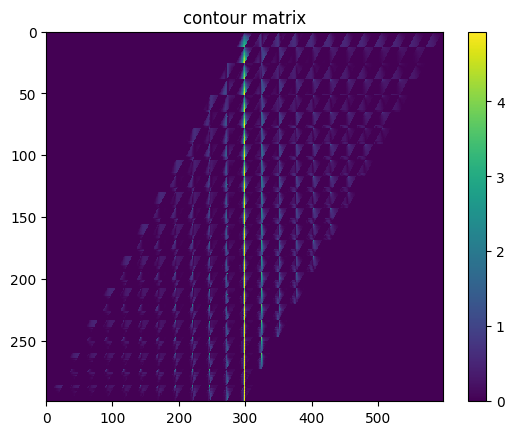

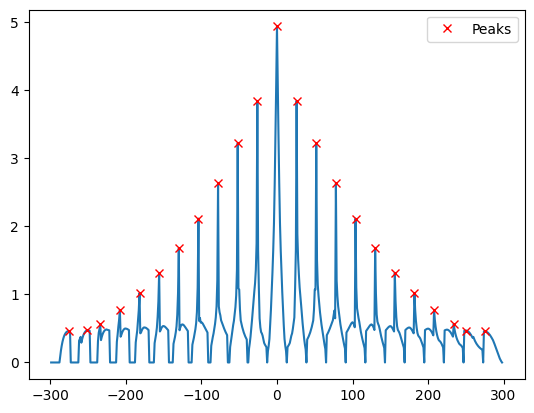

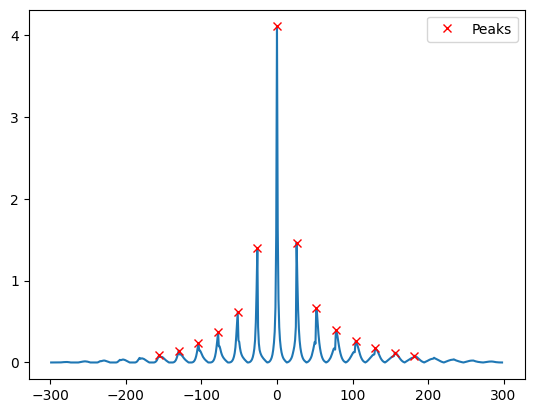

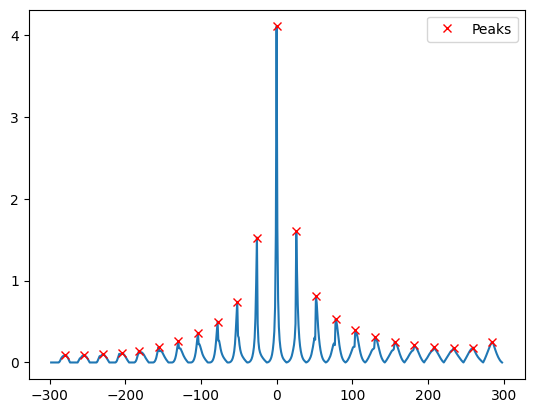

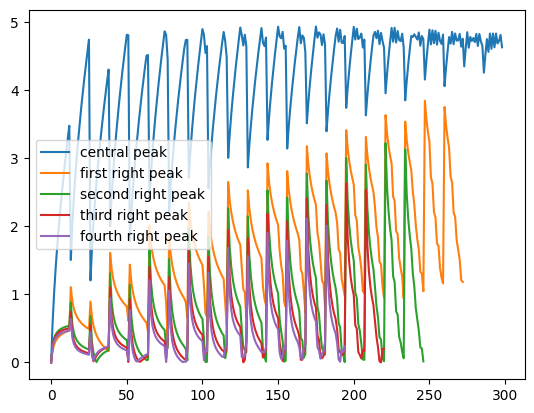

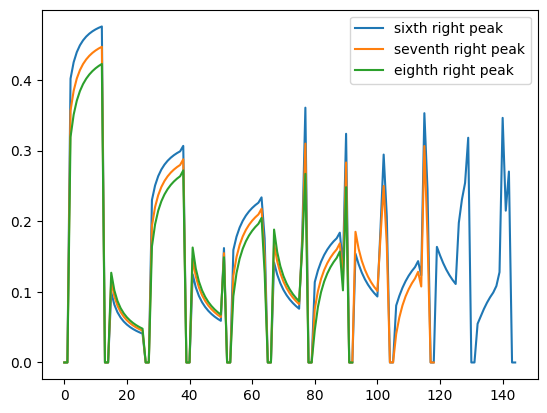

In [6]:
files = [ 'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.5.45e-04.tau.1\\ei.h5']
peak_matr = np.zeros([5,22])
for j,filename in enumerate(files):
    with h5.File(filename, 'r') as file:
        fn.dump_h5(file)

        # kperp = 0
        # data = file['%05i' % kperp]
        # Select data for corresponding kperp

        # Assuming you want to select data for a specific group within the HDF5 file
        data_group = file['Ceipj']


        # Select the matrix for electrons-electrons collisions
        matrix_ee = np.array(data_group['CeipjT'])

   
    contour = np.zeros([matrix_ee.shape[0], 2*matrix_ee.shape[1]])

    for i in range(matrix_ee.shape[0]):
        contour[i,(matrix_ee.shape[0] - i) : (2*matrix_ee.shape[0] - i  )] = abs(matrix_ee[i,:])

plt.figure()
plt.pcolor(contour)
plt.title('contour matrix' )
plt.gca().invert_yaxis()
plt.colorbar()

sum = np.mean(contour, axis = 0)
mean_prec = np.zeros(contour.shape[1])
for i in range(contour.shape[1]):
    if(i<=matrix_ee.shape[0]):
        mean_prec[i] = np.mean(contour[matrix_ee.shape[0] - i : ,i])
    
    else:
        mean_prec[i] = np.mean(contour[0 : -(i -matrix_ee.shape[0]) ,i])
max_contour = np.max(contour, axis = 0)

plt.figure()
plt.plot(np.arange(2*matrix_ee.shape[0]) - matrix_ee.shape[0], max_contour)
x = (np.arange(2*matrix_ee.shape[0]) - matrix_ee.shape[0])
peaks, _ = find_peaks(max_contour, prominence = 0.28)
plt.plot(x[peaks], max_contour[peaks], 'rx', label='Peaks')
plt.legend()
plt.show()
plt.plot(x, sum)
peaks, _ = find_peaks(sum, prominence = 0.08)
plt.plot(x[peaks], sum[peaks], 'rx', label='Peaks')
plt.legend()

    
plt.figure()
plt.plot(np.arange(2*matrix_ee.shape[0]) - matrix_ee.shape[0], mean_prec)
peaks, _ = find_peaks(mean_prec, prominence = 0.08)
plt.plot(x[peaks], mean_prec[peaks], 'rx', label='Peaks')
plt.legend()
plt.legend()

plt.figure()
plt.plot(np.arange(matrix_ee.shape[0] ), contour[0 :, matrix_ee.shape[0] ],label = 'central peak')
plt.legend()

plt.plot(np.arange(matrix_ee.shape[0] - 26), contour[0 : -(26), matrix_ee.shape[0] + 26],label = 'first right peak')
plt.legend()



# plt.plot(np.arange(matrix_ee.shape[0] - 27), contour[0 : -(27), matrix_ee.shape[0] + 27],label = ' right point next to first right peak')
# plt.legend()



# plt.plot(np.arange(matrix_ee.shape[0] - 25), contour[0 : -(25), matrix_ee.shape[0] + 25],label = ' left point next to first right peak')
# plt.legend()


# plt.plot(np.arange(26,matrix_ee.shape[0] ), contour[26 :, matrix_ee.shape[0] - 26 ],label = 'first left peak peak')
# plt.legend()


plt.plot(np.arange(matrix_ee.shape[0] - 52 ), contour[0 : - 52, matrix_ee.shape[0] + 52 ],label = 'second right peak')
plt.legend()


# plt.plot(np.arange(matrix_ee.shape[0] - 53 ), contour[0 : - 53, matrix_ee.shape[0] + 53 ],label = 'right point next to second right peak')
# plt.legend()


# plt.plot(np.arange(matrix_ee.shape[0] - 51 ), contour[0 : - 51, matrix_ee.shape[0] + 51 ],label = 'left point next to second right peak')
# plt.legend()


# plt.plot(np.arange(52,matrix_ee.shape[0] ), contour[52 :, matrix_ee.shape[0] - 52 ],label = 'second left peak peak')
# plt.legend()


plt.plot(np.arange(matrix_ee.shape[0] - 78 ), contour[0 : - 78, matrix_ee.shape[0] + 78 ],label = 'third right peak')
plt.legend()


# plt.plot(np.arange(78,matrix_ee.shape[0] ), contour[78 :, matrix_ee.shape[0] - 78 ],label = 'third left peak peak')
# plt.legend()

plt.plot(np.arange(matrix_ee.shape[0] - 104 ), contour[0 : - 104, matrix_ee.shape[0] + 104 ],label = 'fourth right peak')
plt.legend()

plt.figure()


# plt.plot(np.arange(matrix_ee.shape[0] - 52 ), contour[0 : - 52, matrix_ee.shape[0] + 52 ],label = 'second right peak')
# plt.legend()


# # plt.plot(np.arange(matrix_ee.shape[0] - 53 ), contour[0 : - 53, matrix_ee.shape[0] + 53 ],label = 'right point next to second right peak')
# # plt.legend()


# # plt.plot(np.arange(matrix_ee.shape[0] - 51 ), contour[0 : - 51, matrix_ee.shape[0] + 51 ],label = 'left point next to second right peak')
# # plt.legend()


# # plt.plot(np.arange(52,matrix_ee.shape[0] ), contour[52 :, matrix_ee.shape[0] - 52 ],label = 'second left peak peak')
# # plt.legend()


# plt.plot(np.arange(matrix_ee.shape[0] - 78 ), contour[0 : - 78, matrix_ee.shape[0] + 78 ],label = 'third right peak')
# plt.legend()


# # plt.plot(np.arange(78,matrix_ee.shape[0] ), contour[78 :, matrix_ee.shape[0] - 78 ],label = 'third left peak peak')
# # plt.legend()

# plt.plot(np.arange(matrix_ee.shape[0] - 104 ), contour[0 : - 104, matrix_ee.shape[0] + 104 ],label = 'fourth right peak')
# plt.legend()


# plt.plot(np.arange(matrix_ee.shape[0] - 130 ), contour[0 : - 130, matrix_ee.shape[0] + 130 ],label = 'fifth right peak')
# plt.legend()


plt.plot(np.arange(matrix_ee.shape[0] - 154 ), contour[0 : - 154, matrix_ee.shape[0] + 154 ],label = 'sixth right peak')
plt.legend()


plt.plot(np.arange(matrix_ee.shape[0] - 180 ), contour[0 : - 180, matrix_ee.shape[0] + 180 ],label = 'seventh right peak')
plt.legend()


plt.plot(np.arange(matrix_ee.shape[0] - 206 ), contour[0 : - 206, matrix_ee.shape[0] + 206 ],label = 'eighth right peak')
plt.legend()

> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - rows_eF ('title')
 - rows_eT ('title')
> files
 - inputs ()
> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - rows_eF ('title')
 - rows_eT ('title')
> files
 - inputs ()
> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niF

C:\Users\anton\AppData\Local\Temp\ipykernel_2688\2746537580.py:49: RuntimeWarning: divide by zero encountered in divide
  ratio = abs(peak_matr[:,i])/peak_matr[0,i]
C:\Users\anton\AppData\Local\Temp\ipykernel_2688\2746537580.py:49: RuntimeWarning: invalid value encountered in divide
  ratio = abs(peak_matr[:,i])/peak_matr[0,i]


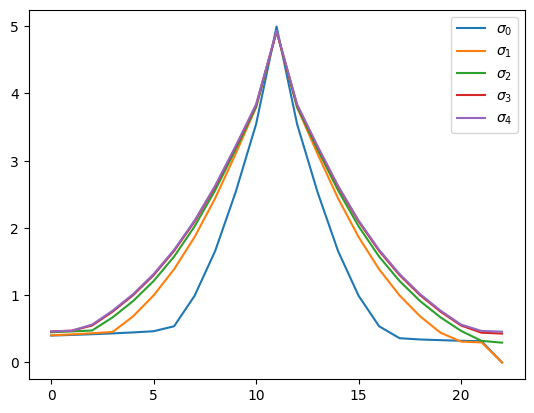

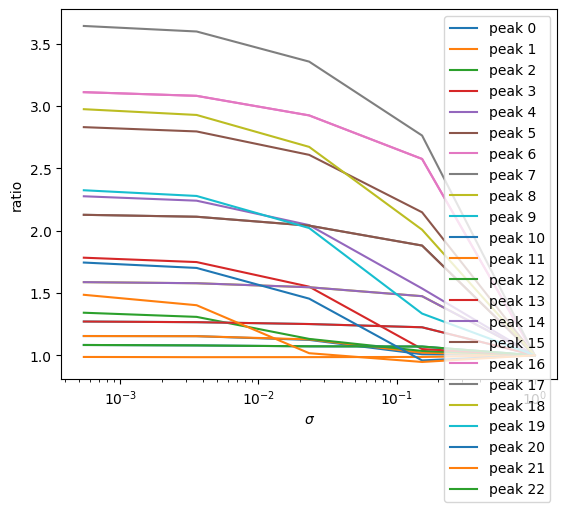

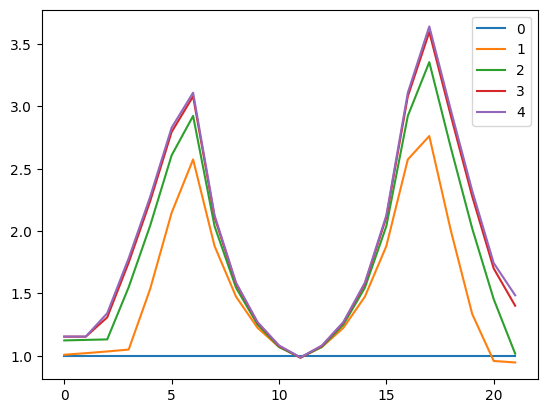

In [134]:
files = ['C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.1.00e+00.tau.1/ei.h5', 'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.1.53e-01.tau.1/ei.h5', 'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.2.33e-02.tau.1/ei.h5',
                            'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.3.57e-03.tau.1/ei.h5', 'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.5.45e-04.tau.1/ei.h5']
peak_matr = np.zeros([5,23])
for j,filename in enumerate(files):
    with h5.File(filename, 'r') as file:
        fn.dump_h5(file)

        # kperp = 0
        # data = file['%05i' % kperp]
        # Select data for corresponding kperp

        # Assuming you want to select data for a specific group within the HDF5 file
        data_group = file['Ceipj']


        # Select the matrix for electrons-electrons collisions
        matrix_ee = np.array(data_group['CeipjT'])

    contour = np.zeros([matrix_ee.shape[0], 2*matrix_ee.shape[1]])

    for i in range(matrix_ee.shape[0]):
        contour[i,(matrix_ee.shape[0] - i) : (2*matrix_ee.shape[0] - i  )] = abs(matrix_ee[i,:])

    # plt.figure()
    # plt.pcolor(contour)
    # plt.title('contour matrix' )
    # plt.gca().invert_yaxis()
    # plt.colorbar()
    # contour = np.max(contour, axis = 0)
    # plt.figure()
    # plt.plot(np.arange(2*trial_ee.shape[0]) - matrix_ee.shape[0], contour)

    contour = np.max(contour, axis = 0)
    x = (np.arange(2*matrix_ee.shape[0]) - matrix_ee.shape[0])
    peaks, _ = find_peaks(contour, prominence = 0.28)
    peak_matr[j,0:len(peaks)] = contour[peaks]
    # plt.plot(x[peaks], contour[peaks], 'rx', label='Peaks')
    # plt.legend()
    # plt.show()


for i in range(0,5):
    plt.plot(np.arange(len(peak_matr[i,:])),peak_matr[i,:], label = f'$\sigma_{{{i}}}$' )
    plt.legend()

ratio_matr = np.zeros([5,23])
plt.figure()
for i in range(0,23):
    ratio = abs(peak_matr[:,i])/peak_matr[0,i]
    ratio_matr[:,i] = ratio
    plt.semilogx(np.array([1,0.153,2.33e-02,3.57e-03,5.45e-04]), ratio, label = f'peak {i}')
    plt.xlabel('$\sigma$')
    plt.ylabel('ratio')
    plt.legend()

plt.figure()
for i in range(5):
    plt.plot(np.arange(len(ratio_matr[i,:])), ratio_matr[i,:], label =f'{i}')
    plt.legend()

> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - rows_eF ('title')
 - rows_eT ('title')
> files
 - inputs ()
> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - rows_eF ('title')
 - rows_eT ('title')
> files
 - inputs ()
> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niF

C:\Users\anton\AppData\Local\Temp\ipykernel_2688\3108907890.py:50: RuntimeWarning: divide by zero encountered in divide
  ratio = abs(peak_matr[:,i])/peak_matr[0,i]
C:\Users\anton\AppData\Local\Temp\ipykernel_2688\3108907890.py:50: RuntimeWarning: invalid value encountered in divide
  ratio = abs(peak_matr[:,i])/peak_matr[0,i]


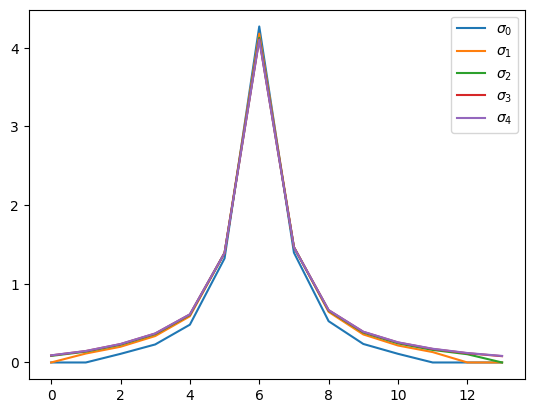

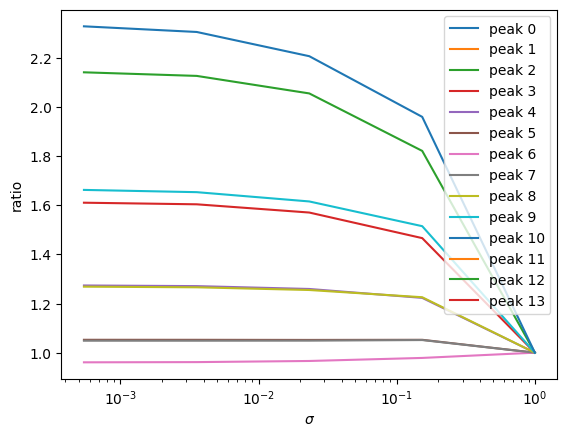

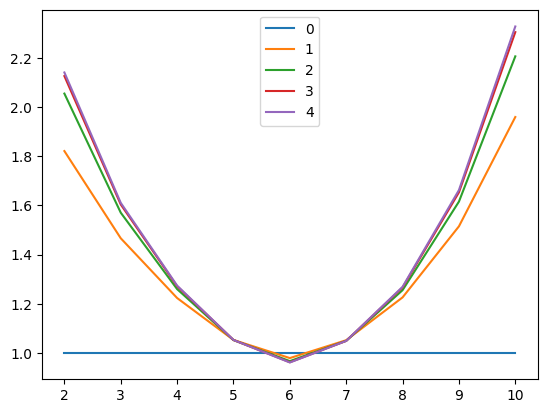

In [141]:
files = ['C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.1.00e+00.tau.1/ei.h5', 'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.1.53e-01.tau.1/ei.h5', 'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.2.33e-02.tau.1/ei.h5',
                            'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.3.57e-03.tau.1/ei.h5', 'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.5.45e-04.tau.1/ei.h5']
peak_matr = np.zeros([5,14])
for j,filename in enumerate(files):
    with h5.File(filename, 'r') as file:
        fn.dump_h5(file)

        # kperp = 0
        # data = file['%05i' % kperp]
        # Select data for corresponding kperp

        # Assuming you want to select data for a specific group within the HDF5 file
        data_group = file['Ceipj']


        # Select the matrix for electrons-electrons collisions
        matrix_ee = np.array(data_group['CeipjT'])

    contour = np.zeros([matrix_ee.shape[0], 2*matrix_ee.shape[1]])

    for i in range(matrix_ee.shape[0]):
        contour[i,(matrix_ee.shape[0] - i) : (2*matrix_ee.shape[0] - i  )] = abs(matrix_ee[i,:])

    # plt.figure()
    # plt.pcolor(contour)
    # plt.title('contour matrix' )
    # plt.gca().invert_yaxis()
    # plt.colorbar()
    # contour = np.max(contour, axis = 0)
    # plt.figure()
    # plt.plot(np.arange(2*trial_ee.shape[0]) - matrix_ee.shape[0], contour)

    sum = np.mean(contour, axis = 0)
    x = (np.arange(2*matrix_ee.shape[0]) - matrix_ee.shape[0])
    peaks, _ = find_peaks(sum, prominence = 0.08)
    peak_matr[j,(2 -  j)*(j<2) :len(peaks) + (2 -  j)*(j<2)] = sum[peaks]
    # plt.plot(x[peaks], contour[peaks], 'rx', label='Peaks')
    # plt.legend()
    # plt.show()


for i in range(0,5):
    plt.plot(np.arange(len(peak_matr[i,:])) ,peak_matr[i,:], label = f'$\sigma_{{{i}}}$' )
    plt.legend()

ratio_matr = np.zeros([5,14])
print(peak_matr[0,:])
plt.figure()
for i in range(0,14):
    ratio = abs(peak_matr[:,i])/peak_matr[0,i]
    ratio_matr[:,i] = ratio
    plt.semilogx(np.array([1,0.153,2.33e-02,3.57e-03,5.45e-04]), ratio, label = f'peak {i}')
    plt.xlabel('$\sigma$')
    plt.ylabel('ratio')
    plt.legend()
print(ratio_matr[1,:])
plt.figure()
for i in range(5):
    plt.plot(np.arange(len(ratio_matr[i,:])), ratio_matr[i,:], label =f'{i}')
    plt.legend()

> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - rows_eF ('title')
 - rows_eT ('title')
> files
 - inputs ()
> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - rows_eF ('title')
 - rows_eT ('title')
> files
 - inputs ()
> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niF

C:\Users\anton\AppData\Local\Temp\ipykernel_2688\3820917572.py:46: RuntimeWarning: divide by zero encountered in divide
  ratio = abs(peak_matr[:,i])/peak_matr[0,i]
C:\Users\anton\AppData\Local\Temp\ipykernel_2688\3820917572.py:46: RuntimeWarning: invalid value encountered in divide
  ratio = abs(peak_matr[:,i])/peak_matr[0,i]


Text(0.5, 0, 'ratio')

<Figure size 640x480 with 0 Axes>

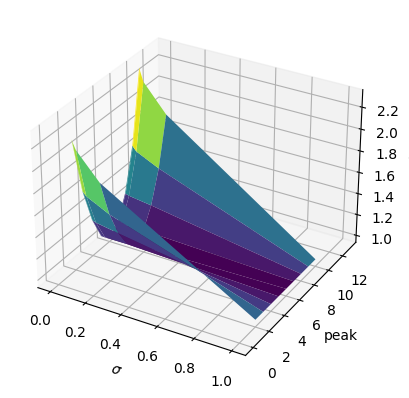

In [159]:
files = ['C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.1.00e+00.tau.1/ei.h5', 'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.1.53e-01.tau.1/ei.h5', 'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.2.33e-02.tau.1/ei.h5',
                            'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.3.57e-03.tau.1/ei.h5', 'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.5.45e-04.tau.1/ei.h5']
peak_matr = np.zeros([5,14])
for j,filename in enumerate(files):
    with h5.File(filename, 'r') as file:
        fn.dump_h5(file)

        # kperp = 0
        # data = file['%05i' % kperp]
        # Select data for corresponding kperp

        # Assuming you want to select data for a specific group within the HDF5 file
        data_group = file['Ceipj']


        # Select the matrix for electrons-electrons collisions
        matrix_ee = np.array(data_group['CeipjT'])

    contour = np.zeros([matrix_ee.shape[0], 2*matrix_ee.shape[1]])

    for i in range(matrix_ee.shape[0]):
        contour[i,(matrix_ee.shape[0] - i) : (2*matrix_ee.shape[0] - i  )] = abs(matrix_ee[i,:])

    # plt.figure()
    # plt.pcolor(contour)
    # plt.title('contour matrix' )
    # plt.gca().invert_yaxis()
    # plt.colorbar()
    # contour = np.max(contour, axis = 0)
    # plt.figure()
    # plt.plot(np.arange(2*trial_ee.shape[0]) - matrix_ee.shape[0], contour)

    sum = np.mean(contour, axis = 0)
    x = (np.arange(2*matrix_ee.shape[0]) - matrix_ee.shape[0])
    peaks, _ = find_peaks(sum, prominence = 0.08)
    peak_matr[j,(2 -  j)*(j<2) :len(peaks) + (2 -  j)*(j<2)] = sum[peaks]
    # plt.plot(x[peaks], contour[peaks], 'rx', label='Peaks')
    # plt.legend()
    # plt.show()



ratio_matr = np.zeros([5,14])
plt.figure()
for i in range(0,14):
    ratio = abs(peak_matr[:,i])/peak_matr[0,i]
    ratio_matr[:,i] = ratio

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(np.array([1,0.153,2.33e-02,3.57e-03,5.45e-04]), np.arange(len(ratio_matr[0,:])))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, ratio_matr.T, cmap='viridis')

ax.set_xlabel('$\sigma$')
ax.set_ylabel('peak')
ax.set_zlabel('ratio')


> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - rows_eF ('title')
 - rows_eT ('title')
> files
 - inputs ()
(22,)
> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - rows_eF ('title')
 - rows_eT ('title')
> files
 - inputs ()
(22,)
> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', '

C:\Users\anton\AppData\Local\Temp\ipykernel_2688\2660801589.py:47: RuntimeWarning: divide by zero encountered in divide
  ratio = abs(peak_matr[:,i])/peak_matr[0,i]
C:\Users\anton\AppData\Local\Temp\ipykernel_2688\2660801589.py:47: RuntimeWarning: invalid value encountered in divide
  ratio = abs(peak_matr[:,i])/peak_matr[0,i]


<Figure size 640x480 with 0 Axes>

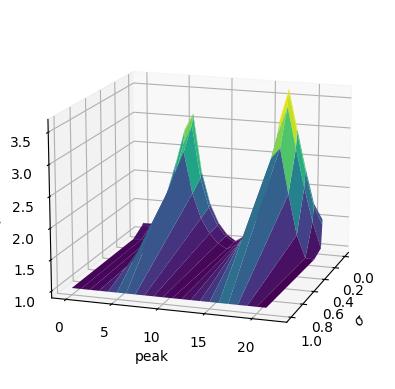

In [157]:
files = ['C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.1.00e+00.tau.1/ei.h5', 'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.1.53e-01.tau.1/ei.h5', 'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.2.33e-02.tau.1/ei.h5',
                            'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.3.57e-03.tau.1/ei.h5', 'C:\\Users\\anton\\Downloads\\sigma_scan\\dkcoulomb.22.12.sigma.5.45e-04.tau.1/ei.h5']
peak_matr = np.zeros([5,23])
for j,filename in enumerate(files):
    with h5.File(filename, 'r') as file:
        fn.dump_h5(file)

        # kperp = 0
        # data = file['%05i' % kperp]
        # Select data for corresponding kperp

        # Assuming you want to select data for a specific group within the HDF5 file
        data_group = file['Ceipj']


        # Select the matrix for electrons-electrons collisions
        matrix_ee = np.array(data_group['CeipjT'])

    contour = np.zeros([matrix_ee.shape[0], 2*matrix_ee.shape[1]])

    for i in range(matrix_ee.shape[0]):
        contour[i,(matrix_ee.shape[0] - i) : (2*matrix_ee.shape[0] - i  )] = abs(matrix_ee[i,:])

    # plt.figure()
    # plt.pcolor(contour)
    # plt.title('contour matrix' )
    # plt.gca().invert_yaxis()
    # plt.colorbar()
    # contour = np.max(contour, axis = 0)
    # plt.figure()
    # plt.plot(np.arange(2*trial_ee.shape[0]) - matrix_ee.shape[0], contour)

    contour = np.max(contour, axis = 0)
    x = (np.arange(2*matrix_ee.shape[0]) - matrix_ee.shape[0])
    peaks, _ = find_peaks(contour, prominence = 0.28)
    print(peaks.shape)
    peak_matr[j,0: len(peaks)] = contour[peaks]
    # plt.plot(x[peaks], contour[peaks], 'rx', label='Peaks')
    # plt.legend()
    # plt.show()



ratio_matr = np.zeros([5,23])
plt.figure()
for i in range(0,23):
    ratio = abs(peak_matr[:,i])/peak_matr[0,i]
    ratio_matr[:,i] = ratio
    
X, Y = np.meshgrid(np.array([1,0.153,2.33e-02,3.57e-03,5.45e-04]), np.arange(len(ratio_matr[0,:])))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, ratio_matr.T, cmap='viridis')

ax.set_xlabel('$\sigma$')
ax.set_ylabel('peak')
ax.set_zlabel('ratio')

ax.view_init(elev=15, azim=18)  

In [57]:
U_even,S_even,VT_even = np.linalg.svd(matrix_ee)
U_odd,S_odd,VT_odd = np.linalg.svd(B)

S_even /= np.linalg.norm(S_even)
S_odd /= np.linalg.norm(S_odd)
plt.plot(np.arange(S_even.shape[0]),S_even)
plt.plot(np.arange(S_odd.shape[0]),S_odd)
plt.show()
print('Difference berween submatrices spectra:',np.linalg.norm(S_even[0:110] - S_odd))


LinAlgError: SVD did not converge

In [ ]:
for i in range (1,A.shape[0]):
    magnitude = np.linalg.norm(abs(A[i,:]))
    relevance = abs(A[i,:]) 
    plt.plot(np.arange(0,A.shape[0]) - i, relevance, label = '{}'.format(i))
    plt.title('even_submatrix')
    plt.legend()

plt.show()

In [ ]:
trial = np.zeros(matrix_ee.shape)
for i in range(matrix_ee.shape[0]):
    for j in range(matrix_ee.shape[1]):
        if ((abs(i-j)%12<=2 or abs(i-j)%12>=10) and abs(i-j)<27) : #rewrite filter
            trial[i,j] = matrix_ee[i,j]

# for i in range (1,trial.shape[0]):
#     magnitude = np.linalg.norm(abs(trial[i,:]))
#     relevance = abs(trial[i,:]) 
#     plt.plot(np.arange(0,trial.shape[0]) - i, relevance, label = '{}'.format(i))
#     plt.title('even_submatrix')
#     plt.legend()

# plt.show()
trial1 = np.zeros(matrix_ee.shape)
for i in range(matrix_ee.shape[0]):
    for j in range(matrix_ee.shape[1]):
        if ( abs(i-j)<27 ):#or (abs(i-j)<16 and abs(i-j)>14)) :
            trial1[i,j] = matrix_ee[i,j]

plt.figure()
plt.pcolor(trial)
plt.title('Peak + Global Window' )
plt.xlabel('(p,j)')
plt.ylabel('(p,j)')
plt.gca().invert_yaxis()
plt.colorbar()
plt.savefig('matrix_ee_peak_app.eps', format = 'eps')
plt.figure()
plt.pcolor(trial1)
plt.title('Collision Electrons-electrons Global Window' )
plt.xlabel('(p,j)')
plt.ylabel('(p,j)')
plt.gca().invert_yaxis()
plt.colorbar()
plt.savefig('matrix_ee_glob_app.eps', format = 'eps')
plt.figure()
plt.pcolor(matrix_ee)
plt.title('Collision Electrons-electrons P=%i, J=%i' )#% (dims_e[0],dims_e[1]))
plt.xlabel('(p,j)')
plt.ylabel('(p,j)')
plt.gca().invert_yaxis()
plt.colorbar()

trial_err = 0
trial_err1 =0 
iters = 200
for _ in range(iters):
    coeff = np.random.rand(matrix_ee.shape[0])
    sol = matrix_ee@coeff
    sol_trial = trial@coeff
    sol_trial1 = trial1@coeff
    trial_err += np.linalg.norm(sol - sol_trial)/np.linalg.norm(sol)/iters
    trial_err1 += np.linalg.norm(sol - sol_trial1)/np.linalg.norm(sol)/iters

plt.savefig('matrix_ee.eps', format = 'eps')
print(trial_err, trial_err1)
plt.figure()
plt.title('Diagonal behaviour')
plt.plot(np.arange(66), np.diag(matrix_ee))
plt.plot(np.arange(66), -np.log(np.power(np.arange(66), 1/3)**2) -1.45)
plt.xlabel('I-th element of the diagonal')
plt.savefig('diag_beha.eps', format = 'eps')
plt.show()
print(np.count_nonzero(trial), np.count_nonzero(trial1), np.count_nonzero(matrix_ee))




In [ ]:

errs = []
for k in range(matrix_ee.shape[0]):
    trial1 = np.zeros(matrix_ee.shape)
    for i in range(matrix_ee.shape[0]):
        for j in range(matrix_ee.shape[1]):
            if ( abs(i-j) <k) :
                trial1[i,j] = matrix_ee[i,j]
                
    trial_err1 =0 
    iters = 100
    for _ in range(iters):
        coeff = np.random.rand(matrix_ee.shape[1])
        sol = matrix_ee@coeff
        sol_trial1 = trial1@coeff
        trial_err1 += np.linalg.norm(sol - sol_trial1)/np.linalg.norm(sol)/iters
    errs.append(trial_err1)
plt.axhline(y=0, color='black', label='Horizontal Line at y=20')
plt.xlabel('Window size')
plt.ylabel('accuracy')
plt.plot(np.arange(matrix_ee.shape[0]), errs)
#plt.savefig('accuracy.eps', format = 'eps')
plt.show()

for k in range(matrix_ee.shape[0]):
    trial1 = np.zeros(matrix_ee.shape)
    for i in range(matrix_ee.shape[0]):
        for j in range(matrix_ee.shape[1]):
            if ( abs(i-j) <k) :
                trial1[i,j] = matrix_ee[i,j]
                
    trial_err1 =0 
    iters = 100
    for _ in range(iters):
        coeff = np.random.rand(matrix_ee.shape[1])
        sol = matrix_ee@coeff
        sol_trial1 = trial1@coeff
        trial_err1 += np.linalg.norm(sol - sol_trial1)/np.linalg.norm(sol)/iters
        
plt.xlabel('Window size')
plt.ylabel('accuracy')
plt.plot(np.arange(matrix_ee.shape[0]), errs)
plt.show()

# errs = []
# for k in range(66):
#     for l in range(66):
#         trial1 = np.zeros(matrix_ee.shape)
#         for i in range(matrix_ee.shape[0]):
#             for j in range(matrix_ee.shape[1]):
#                 if ( (i-j) <k or (i-j)>-l) :
#                     trial1[i,j] = matrix_ee[i,j]
                    
#         trial_err1 =0 
#         iters = 100
#         for _ in range(iters):
#             coeff = np.random.rand(matrix_ee.shape[1])
#             sol = matrix_ee@coeff
#             sol_trial1 = trial1@coeff
#             trial_err1 += np.linalg.norm(sol - sol_trial1)/np.linalg.norm(sol)/iters
#         errs.append(trial_err1)
# plt.xlabel('Window size')
# plt.ylabel('accuracy')
# plt.plot(np.arange(66*66), errs)
# plt.show()
# print(np.argmin(errs), np.min(errs))
#plot changes in peak specific wind and total wind

In [ ]:
A_trial = np.zeros([36,36])
row = 0
column = 0
for i in range(66):
    
    for j in range(66):
        if np.floor(i/6)%2 == 0 and np.floor(j/6)%2 == 0:
            A_trial[row,column] = trial[i,j]
            column+=1
            if column == 36:
                row+=1
                column=0
A_trial[abs(A_trial) <= 0.00] = 0
plt.figure()
plt.pcolor(A_trial)
plt.title('submatrix_ee_even' )
plt.xlabel('(p,j)')
plt.ylabel('(p,j)')
plt.gca().invert_yaxis()
plt.colorbar()


B_trial= np.zeros([30,30])
row = 0
column = 0
for i in range(66):
    
    for j in range(66):
        if np.floor(i/6)%2 == 1 and np.floor(j/6)%2 == 1:
            B_trial[row,column] = trial[i,j]
            column+=1
            if column == 30:
                row+=1
                column=0

B_trial[abs(B_trial) <= 0.00] = 0
plt.figure()
plt.pcolor(B_trial)
plt.title('submatrix_ee_odd' )
plt.xlabel('(p,j)')
plt.ylabel('(p,j)')
plt.gca().invert_yaxis()
plt.colorbar()
print(np.count_nonzero(A_trial))
print(np.count_nonzero(B_trial))

plt.figure()
for i in range (1,A_trial.shape[0]):
    magnitude = np.linalg.norm(abs(A_trial[i,:]))
    relevance = abs(A_trial[i,:]) 
    plt.plot(np.arange(0,A_trial.shape[0]) - i, relevance, label = '{}'.format(i))
    plt.title('even_submatrix')
    plt.legend()

plt.show()

plt.figure()
for i in range (1,B_trial.shape[0]):
    magnitude = np.linalg.norm(abs(B_trial[i,:]))
    relevance = abs(B_trial[i,:]) 
    plt.plot(np.arange(0,B_trial.shape[0]) - i, relevance, label = '{}'.format(i))
    plt.title('even_submatrix')
    plt.legend()

plt.show()

TEST FOR SOLUTIONS FROM EVEN AND ODD MATRIX

In [ ]:
trial_err = 0
for _ in range(iters):
    coeff = np.random.rand(A.shape[1] - 6)
    sol = A[:30, :30]@coeff
    sol_trial = B@coeff[:30]
    trial_err += np.linalg.norm(sol - sol_trial)/np.linalg.norm(sol)/iters

print(trial_err)



Try to extract information directly by Even and Odd matrix

In [ ]:
A_trial_direct = np.zeros(A.shape)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if ((abs(i-j)%6==0 or  abs(i-j)%6 == 1  or abs(i-j)%6 == 5 or  abs(i-j)%6 == 2  or abs(i-j)%6 == 4) and abs(i-j)<14):#or  abs(i-j)%12 == 2  or abs(i-j)%12 == 10) and abs(i-j)<27) :
            A_trial_direct[i,j] = A[i,j]




B_trial_direct = np.zeros(B.shape)
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        if ((abs(i-j)%6==0 or  abs(i-j)%6 == 1  or abs(i-j)%6 == 5 or  abs(i-j)%6 == 2  or abs(i-j)%6 == 4) and abs(i-j)<13):#or  abs(i-j)%12 == 2  or abs(i-j)%12 == 10) and abs(i-j)<27) :
            B_trial_direct[i,j] = B[i,j]





Now we compare the two approximations (first one by the approximated full matrix and secodn directly by the submatrices)

In [ ]:
trial_err = 0
trial_err_direct =0 
iters = 100
for _ in range(iters):
    coeff = np.random.rand(A.shape[1])
    sol = A@coeff
    sol_trial = A_trial@coeff
    sol_trial_direct = A_trial_direct@coeff
    trial_err += np.linalg.norm(sol - sol_trial)/np.linalg.norm(sol)/iters
    trial_err_direct += np.linalg.norm(sol - sol_trial_direct)/np.linalg.norm(sol)/iters

print(trial_err)
print(trial_err_direct)

print(np.count_nonzero(A_trial), np.count_nonzero(A_trial_direct))

trial_err = 0
trial_err_direct =0 
iters = 100
for _ in range(iters):
    coeff = np.random.rand(B.shape[1])
    sol = B@coeff
    sol_trial = B_trial@coeff
    sol_trial_direct = B_trial_direct@coeff
    trial_err += np.linalg.norm(sol - sol_trial)/np.linalg.norm(sol)/iters
    trial_err_direct += np.linalg.norm(sol - sol_trial_direct)/np.linalg.norm(sol)/iters

print(trial_err)
print(trial_err_direct)

print(np.count_nonzero(B_trial), np.count_nonzero(B_trial_direct))

In [ ]:
for i in range (1, matrix_ee.shape[0] -1):
    magnitude = np.linalg.norm(abs(matrix_ee[i,:]))
    relevance = abs(matrix_ee[i,:])
    if relevance[i+1] == 0 :
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()
    #plt.plot(np.linspace(-60,60,400), 175*f(np.linspace(-60,60,400)), 'o')
plt.show()

for i in range (1, matrix_ee.shape[0] -1):
    magnitude = np.linalg.norm(abs(matrix_ee[i,:]))
    relevance = abs(matrix_ee[i,:])
    if relevance[i-1] == 0 :
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()
    #plt.plot(np.linspace(-60,60,400), 175*f(np.linspace(-60,60,400)), 'o')
plt.show()

for i in range (1, matrix_ee.shape[0] -2):
    magnitude = np.linalg.norm(abs(matrix_ee[i,:]))
    relevance = abs(matrix_ee[i,:])
    if i ==1 :
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()

    elif relevance[i-2]==0   :
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()
    #plt.plot(np.linspace(-60,60,400), 175*f(np.linspace(-60,60,400)), 'o')
plt.show()


for i in range (3, matrix_ee.shape[0]):
    magnitude = np.linalg.norm(abs(matrix_ee[i,:]))
    relevance = abs(matrix_ee[i,:])
    if i == 65 or i == 64:
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()

    elif relevance[i+2]==0   :
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()
    #plt.plot(np.linspace(-60,60,400), 175*f(np.linspace(-60,60,400)), 'o')
plt.show()

for i in range (0, matrix_ee.shape[0]):
    magnitude = np.linalg.norm(abs(matrix_ee[i,:]))
    relevance = abs(matrix_ee[i,:])
    if i==0 or i == 1 or i == 2:
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()

    elif relevance[i-3]==0   :
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()
    #plt.plot(np.linspace(-60,60,400), 175*f(np.linspace(-60,60,400)), 'o')
plt.savefig('right_peak.eps', format = 'eps')
plt.show()

for i in range (1, matrix_ee.shape[0]):
    magnitude = np.linalg.norm(abs(matrix_ee[i,:]))
    relevance = abs(matrix_ee[i,:])
    if i == 65 or i == 64 or i ==63:
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()

    elif relevance[i+3]==0   :
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()
    #plt.plot(np.linspace(-60,60,400), 175*f(np.linspace(-60,60,400)), 'o')
plt.savefig('left_peak.eps', format = 'eps')
plt.show()

In [ ]:

trial = np.zeros(matrix_ee.shape)
for i in range(matrix_ee.shape[0]):
    for j in range(matrix_ee.shape[1]):
        
        if (((abs(i-j)%12==11 and  matrix_ee[i,j]/matrix_ee[i,j + (j<=64) ]  >=  0.01 ) or (abs(i-j)%12==1 and matrix_ee[i,j]/matrix_ee[i,j -1 ]  >= 0.01)
             or abs(i-j)%12==0 or (abs(i-j)%12==10 and  matrix_ee[i,j +(j<=64)]/matrix_ee[i,j + 2*(j<=63) ]  >=  0.01)
            or (abs(i-j)%12==2 and matrix_ee[i,j-1]/matrix_ee[i,j -2 ]  >= 0.01)) and abs(i-j)<27) : 
            trial[i,j] = matrix_ee[i,j]


         


In [ ]:
trial_err = 0
iters = 100
for _ in range(iters):
    coeff = np.random.rand(matrix_ee.shape[1])
    sol = matrix_ee@coeff
    sol_trial = trial@coeff
    trial_err += np.linalg.norm(sol - sol_trial)/np.linalg.norm(sol)/iters

print(trial_err)
print(np.count_nonzero(trial), np.count_nonzero(matrix_ee))

plt.figure()
plt.pcolor(trial)
plt.xlabel('(p,j)')
plt.ylabel('(p,j)')
plt.gca().invert_yaxis()
plt.colorbar()


In [ ]:
for i in range (1, 66):
    magnitude = np.linalg.norm(abs(matrix_ee[i,:]))
    relevance = abs(matrix_ee[i,:])
    if i == 65 or i == 64 or i ==63:
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()

    elif relevance[i+3]==0   :
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()
    #plt.plot(np.linspace(-60,60,400), 175*f(np.linspace(-60,60,400)), 'o')
plt.show()

for i in range (5, 15):
    magnitude = np.linalg.norm(abs(matrix_ee[i,:]))
    relevance = abs(matrix_ee[i,:])
    if i == 65 or i == 64 or i ==63:
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()

    elif relevance[i+3]==0   :
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()
    #plt.plot(np.linspace(-60,60,400), 175*f(np.linspace(-60,60,400)), 'o')
plt.show()

for i in range (0, 66):
    magnitude = np.linalg.norm(abs(matrix_ee[i,:]))
    relevance = abs(matrix_ee[i,:])
    if  np.max(relevance) >= 3.8:
        plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
        plt.title('matrix_ee')
        plt.legend()
plt.show()

In [ ]:
# for i in range(66):
#     magnitude = np.linalg.norm(abs(matrix_ee[i,:]))
#     relevance = abs(matrix_ee[i,:])
#     plt.plot(np.arange(0,matrix_ee.shape[0]) - i, relevance, label = '{}'.format(i))#, color = (1-i/65)*blue + i/65*(red))
#     plt.title('matrix_ee')
#     plt.legend()
#    #plt.plot(np.linspace(-60,60,400), 175*f(np.linspace(-60,60,400)), 'o')
#     custom_ticks = np.arange(0,66, 12)
#     custom_labels = [f'{tick:.1f}' for tick in custom_ticks]

#     plt.xticks(custom_ticks, custom_labels)
#     plt.show()

trial_ee = np.zeros(matrix_ee.shape)
for i in range(matrix_ee.shape[0]):
    for j in range(matrix_ee.shape[1]):
            
            if ((  abs(i-j)%26<=6 or  abs(i-j)%26 >=19 ) and abs(i-j)<290) : 
                
                trial_ee[i,j] = matrix_ee[i,j]


# trial_ii = np.zeros(matrix_ii.shape)
# for i in range(matrix_ii.shape[0]):
#     for j in range(matrix_ii.shape[1]):
            
#             if ((  abs(i-j)%20<=7 or  abs(i-j)%20 >=12 ) and abs(i-j)<110) : 
                
#                 trial_ii[i,j] = matrix_ii[i,j]


> Caapj
 - Ceepj ('ESELF', 'Jmaxe', 'NCPU', 'Pmaxe', 'kperp', 'model', 'neFLR', 'nu', 'system_clock', 'title')
 - rows_e ('title')
> files
 - inputs ()
0.5090864081589631
4137 43066
(299, 299)
> Caapj
 - Ceepj ('ESELF', 'Jmaxe', 'NCPU', 'Pmaxe', 'kperp', 'model', 'neFLR', 'nu', 'system_clock', 'title')
 - rows_e ('title')
> files
 - inputs ()
0.2547828068805878
10999 43066
(299, 299)
> Caapj
 - Ceepj ('ESELF', 'Jmaxe', 'NCPU', 'Pmaxe', 'kperp', 'model', 'neFLR', 'nu', 'system_clock', 'title')
 - rows_e ('title')
> files
 - inputs ()
0.1660390850059877
17326 43066
(299, 299)
> Caapj
 - Ceepj ('ESELF', 'Jmaxe', 'NCPU', 'Pmaxe', 'kperp', 'model', 'neFLR', 'nu', 'system_clock', 'title')
 - rows_e ('title')
> files
 - inputs ()
0.1171236520731112
22919 43066
(299, 299)
> Caapj
 - Ceepj ('ESELF', 'Jmaxe', 'NCPU', 'Pmaxe', 'kperp', 'model', 'neFLR', 'nu', 'system_clock', 'title')
 - rows_e ('title')
> files
 - inputs ()
0.08300047690863031
27740 43066
(299, 299)
> Caapj
 - Ceepj ('ESELF', 'Jm

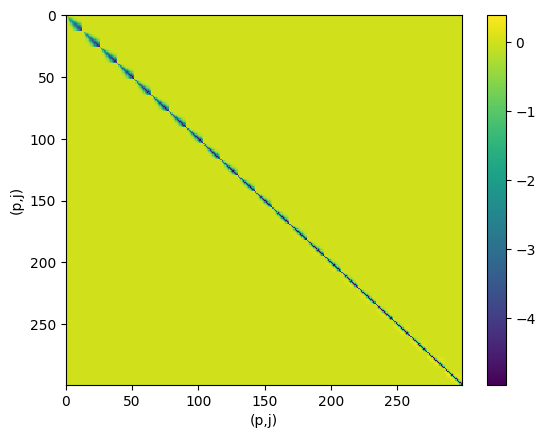

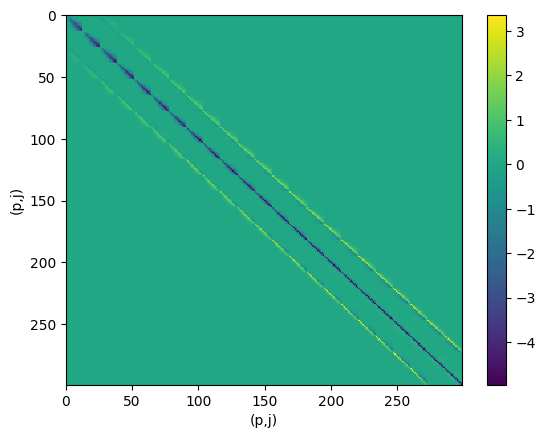

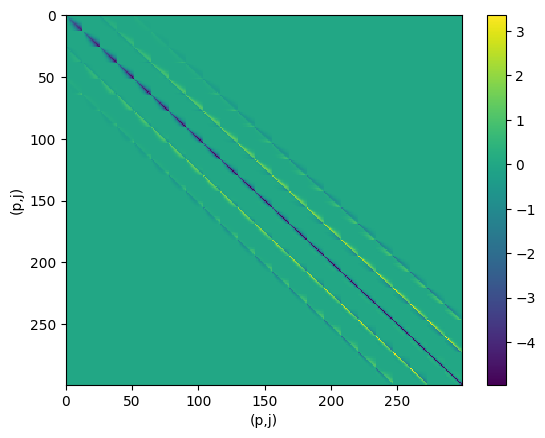

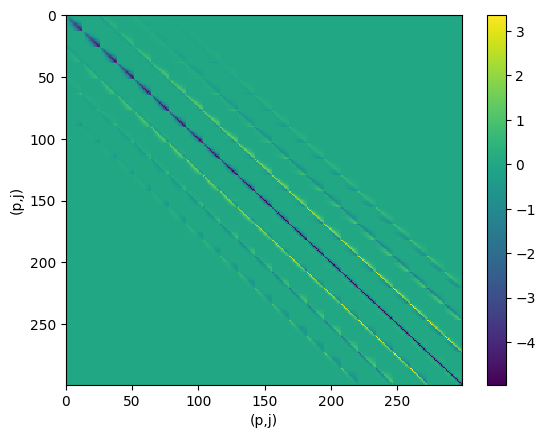

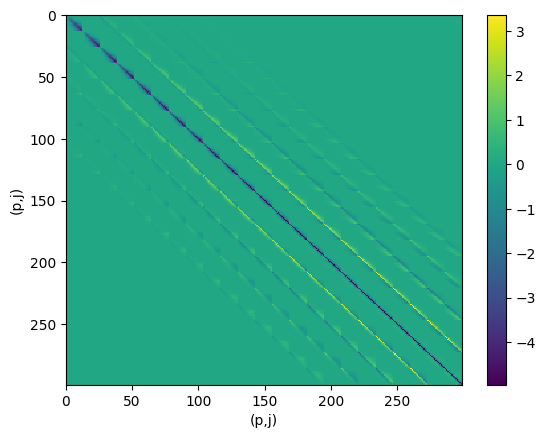

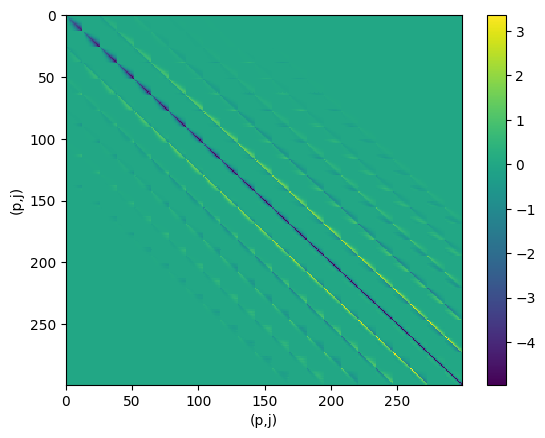

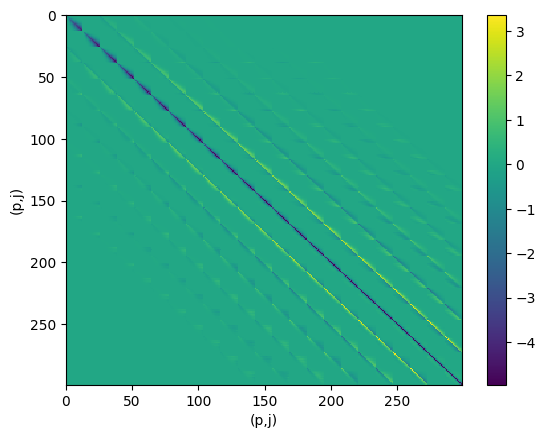

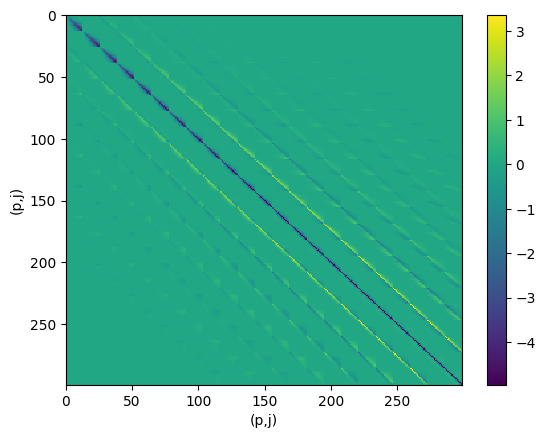

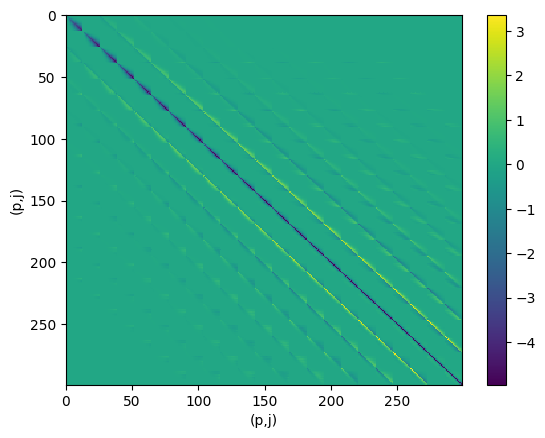

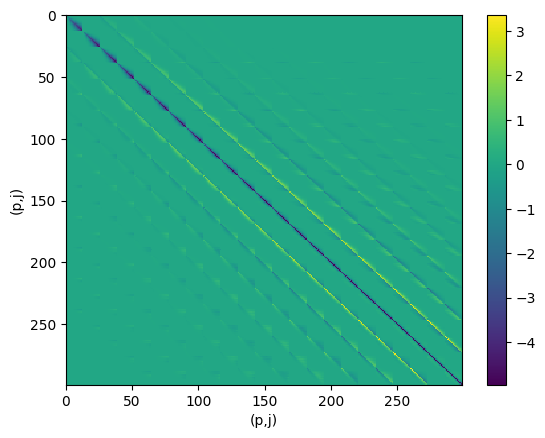

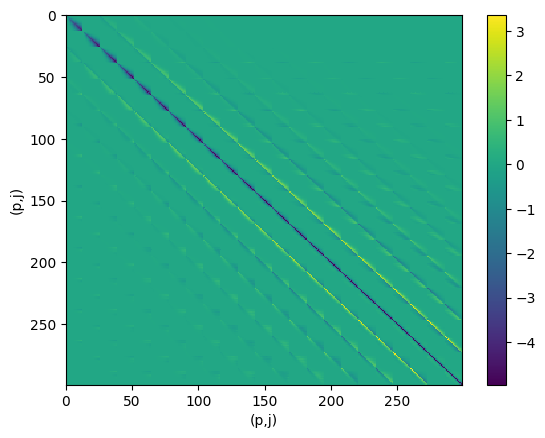

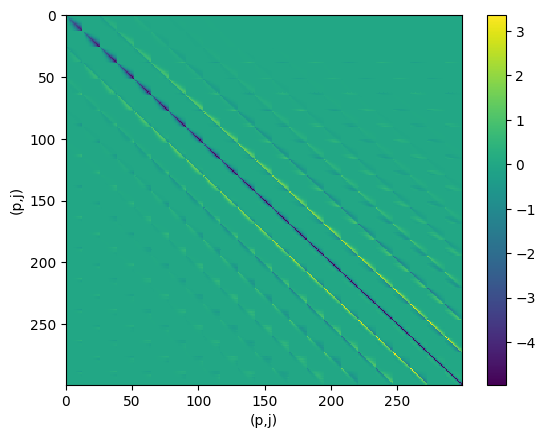

In [4]:
# trial = np.zeros(matrix_ee.shape)
# for i in range(matrix_ee.shape[0]):
#     for j in range(matrix_ee.shape[1]):
            
#             if ((abs(i-j)%12<=2 or  abs(i-j)%12 >=10 ) and abs(i-j)<27) : 
                
#                 trial[i,j] = matrix_ee[i,j]


source_folder = r'dkcoulomb.22.12.tau\dkcoulomb.22.12.sigma.5.45e-04.tau.1'
destination_folder = r'only_glob_22.12.sigma.5.45\dkcoulomb.22.12.sigma.5.45e-04.tau.1'

for peak in np.arange(12):

    m = 17 + peak*24
    shutil.copytree(source_folder, destination_folder)

    filename = 'only_glob_22.12.sigma.5.45\dkcoulomb.22.12.sigma.5.45e-04.tau.1/self.h5'
    with h5.File(filename, 'r+') as file:
    # Dump the content hierarchy
        fn.dump_h5(file)

        data_group = file['Caapj']

        # Select the matrix for electrons-electrons collisions
        matrix_ee = np.array(data_group['Ceepj'])
    
        trial_ee = np.zeros(matrix_ee.shape)
        for i in range(matrix_ee.shape[0]):
            for j in range(matrix_ee.shape[1]):
                if (abs(i-j)<m) : 
                    
                    trial_ee[i,j] = matrix_ee[i,j]

        trial_err = 0
        iters = 100
        for _ in range(iters):
            coeff = np.random.rand(matrix_ee.shape[1])
            sol = matrix_ee@coeff
            sol_trial = trial_ee@coeff
            trial_err += np.linalg.norm(sol - sol_trial)/np.linalg.norm(sol)/iters


        print(trial_err)
        print(np.count_nonzero(trial_ee), np.count_nonzero(matrix_ee))

        plt.figure()
        plt.pcolor(trial_ee)
        plt.xlabel('(p,j)')
        plt.ylabel('(p,j)')
        plt.gca().invert_yaxis()
        plt.colorbar()
        print(matrix_ee.shape)

        file['Caapj']['Ceepj'].write_direct(trial_ee)
        
    file.close()

    old_name = 'only_glob_22.12.sigma.5.45\dkcoulomb.22.12.sigma.5.45e-04.tau.1'
    new_name = f'only_glob_22.12.sigma.5.45/22.12.sigma.5.45e-04.tau.1.onl.glob.{peak}'
    os.rename(old_name, new_name)

# trial_err = 0
# iters = 100
# for _ in range(iters):
#     coeff = np.random.rand(matrix_ii.shape[1])
#     sol = matrix_ii@coeff
#     sol_trial = trial_ii@coeff
#     trial_err += np.linalg.norm(sol - sol_trial)/np.linalg.norm(sol)/iters

# print(trial_err)
# print(np.count_nonzero(trial_ii), np.count_nonzero(matrix_ii))

# plt.figure()
# plt.pcolor(trial_ii)
# plt.xlabel('(p,j)')
# plt.ylabel('(p,j)')
# plt.gca().invert_yaxis()
# plt.colorbar()



0.6609784200825928
3443 43066
0.3003655981058321
9802 43066
0.14999716420101125
15621 43066
0.08239629321335348
20881 43066
0.04853709793183742
25570 43066
0.032773074242518255
29682 43066
0.023254667069265916
33217 43066
0.017101236284446496
36181 43066
0.011895856964034725
38586 43066
0.007643424959326642
40450 43066
0.0039596894508751035
41797 43066
0.0020032049060954757
42657 43066


Text(0.5, 1.0, 'ratio of non zero elements')

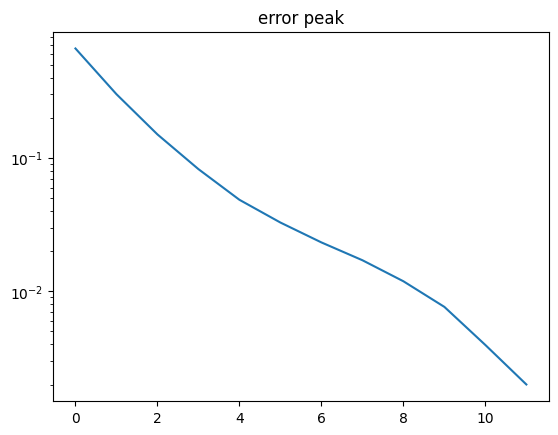

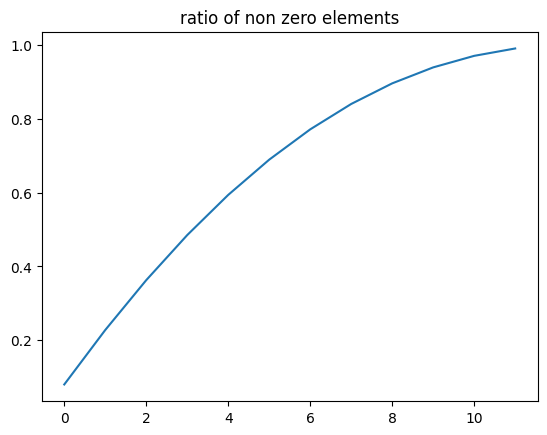

In [4]:
#         matrix_ee = np.array(data_group['Ceepj'])
errs = []
entr_ratios = []
for m in range(12):
    trial_ee = np.zeros(matrix_ee.shape)
    for i in range(matrix_ee.shape[0]):
        for j in range(matrix_ee.shape[1]):
            if (abs(i-j)%26<=m or  abs(i-j)%26 >=26 - m):
                trial_ee[i,j] = matrix_ee[i,j]

    trial_err = 0
    iters = 100
    for _ in range(iters):
        coeff = np.random.rand(matrix_ee.shape[1])
        sol = matrix_ee@coeff
        sol_trial = trial_ee@coeff
        trial_err += np.linalg.norm(sol - sol_trial)/np.linalg.norm(sol)/iters

    entr_ratios.append(np.count_nonzero(trial_ee)/np.count_nonzero(matrix_ee))
    print(trial_err)
    print(np.count_nonzero(trial_ee), np.count_nonzero(matrix_ee))
    errs.append(trial_err)
plt.title('error peak')
plt.semilogy(np.arange(12), errs)
plt.figure()
plt.plot(np.arange(12), entr_ratios)
plt.title('ratio of non zero elements')


0.511264815845633
4137 43066
0.2534020589900928
11189 43066
0.1659178376528169
17530 43066
0.11875309153504142
23150 43066
0.08332970721488936
28046 43066
0.06140964259733684
32221 43066
0.04473642021549778
35684 43066
0.033977819115223476
38450 43066
0.022360357228988412
40540 43066
0.016322899183363423
41981 43066
0.007928011703380707
42806 43066


Text(0.5, 1.0, 'ratio of non zero elements')

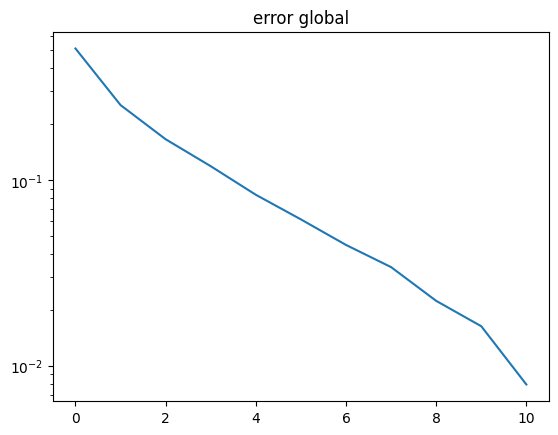

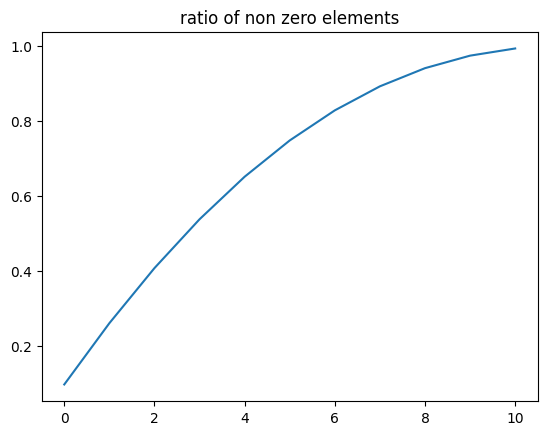

In [5]:
#         matrix_ee = np.array(data_group['Ceepj'])
errs = []
entr_ratios = []
for m in range(11):
    trial_ee = np.zeros(matrix_ee.shape)
    for i in range(matrix_ee.shape[0]):
        for j in range(matrix_ee.shape[1]):
            if ( abs(i-j) < 17 + m*26):
                trial_ee[i,j] = matrix_ee[i,j]

    trial_err = 0
    iters = 100
    for _ in range(iters):
        coeff = np.random.rand(matrix_ee.shape[1])
        sol = matrix_ee@coeff
        sol_trial = trial_ee@coeff
        trial_err += np.linalg.norm(sol - sol_trial)/np.linalg.norm(sol)/iters

    entr_ratios.append(np.count_nonzero(trial_ee)/np.count_nonzero(matrix_ee))
    print(trial_err)
    print(np.count_nonzero(trial_ee), np.count_nonzero(matrix_ee))
    errs.append(trial_err)
plt.title('error global')
plt.semilogy(np.arange(11), errs)
plt.figure()
plt.plot(np.arange(11), entr_ratios)
plt.title('ratio of non zero elements')

> Caapj
 - Ceepj ('ESELF', 'Jmaxe', 'NCPU', 'Pmaxe', 'kperp', 'model', 'neFLR', 'nu', 'system_clock', 'title')
 - rows_e ('title')
> files
 - inputs ()
0.5886432570723386
2432 43066
(299, 299)
> Caapj
 - Ceepj ('ESELF', 'Jmaxe', 'NCPU', 'Pmaxe', 'kperp', 'model', 'neFLR', 'nu', 'system_clock', 'title')
 - rows_e ('title')
> files
 - inputs ()
0.305645430712034
5358 43066
(299, 299)
> Caapj
 - Ceepj ('ESELF', 'Jmaxe', 'NCPU', 'Pmaxe', 'kperp', 'model', 'neFLR', 'nu', 'system_clock', 'title')
 - rows_e ('title')
> files
 - inputs ()
0.16786344750031773
10290 43066
(299, 299)
> Caapj
 - Ceepj ('ESELF', 'Jmaxe', 'NCPU', 'Pmaxe', 'kperp', 'model', 'neFLR', 'nu', 'system_clock', 'title')
 - rows_e ('title')
> files
 - inputs ()
0.09379804884577607
15017 43066
(299, 299)
> Caapj
 - Ceepj ('ESELF', 'Jmaxe', 'NCPU', 'Pmaxe', 'kperp', 'model', 'neFLR', 'nu', 'system_clock', 'title')
 - rows_e ('title')
> files
 - inputs ()
0.05357923815595217
19476 43066
(299, 299)
> Caapj
 - Ceepj ('ESELF', 'Jm

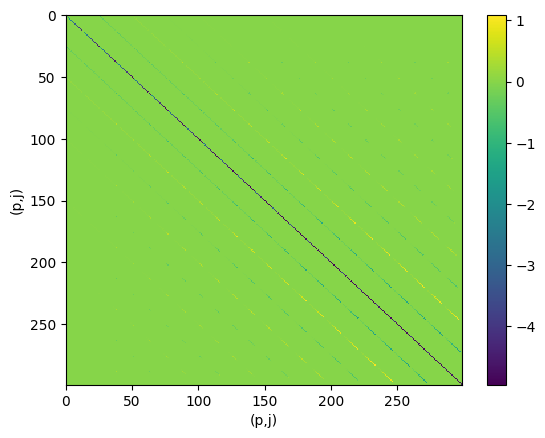

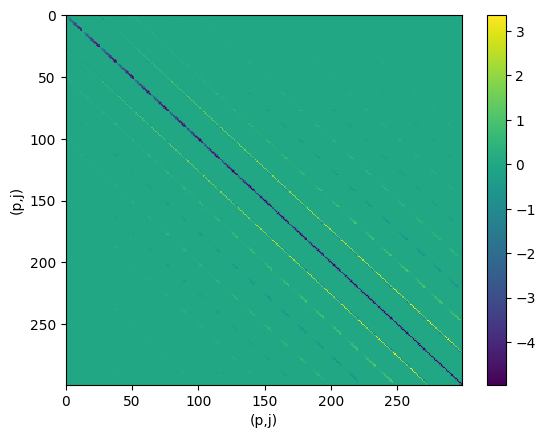

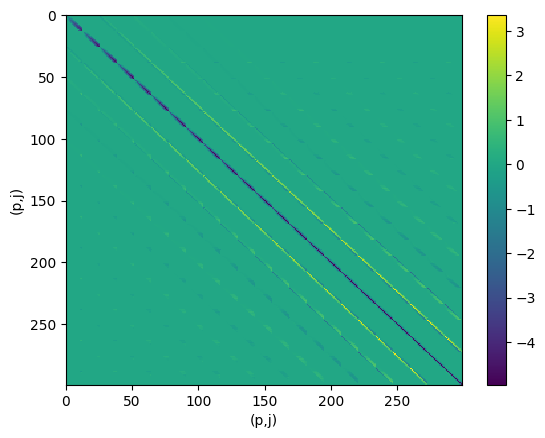

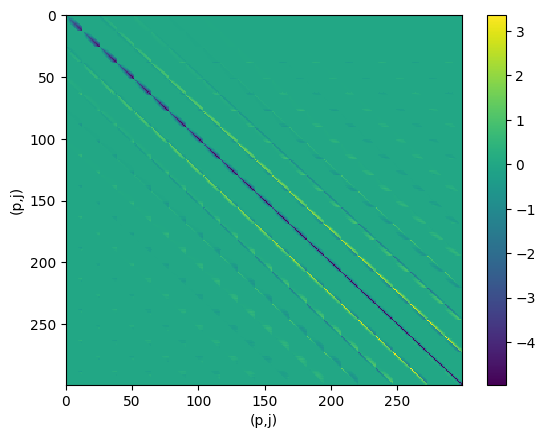

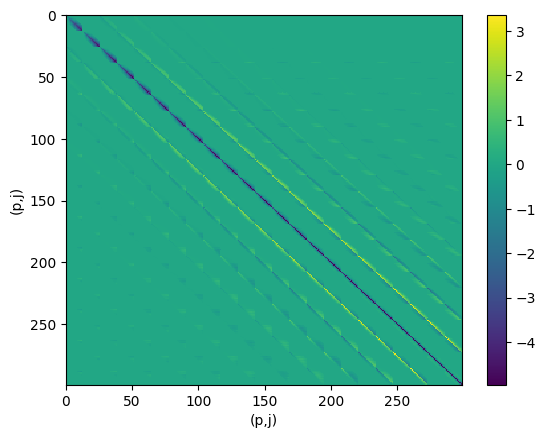

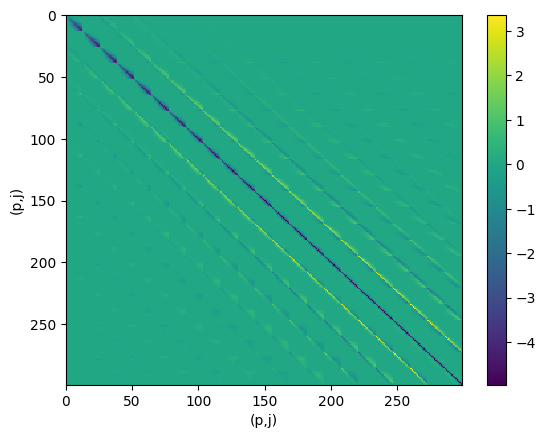

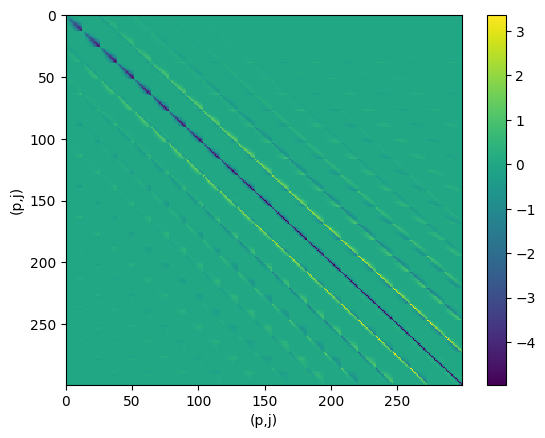

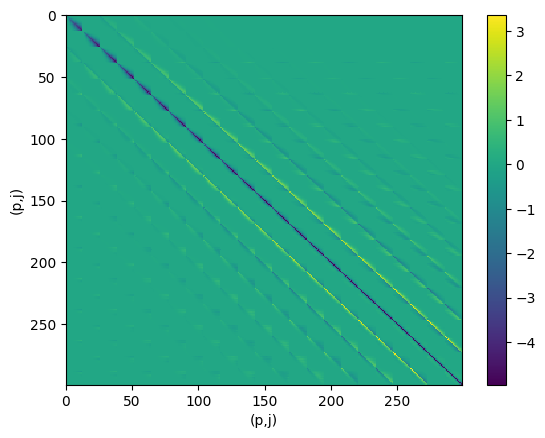

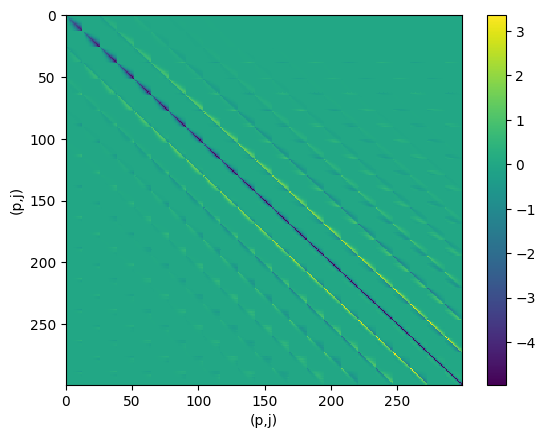

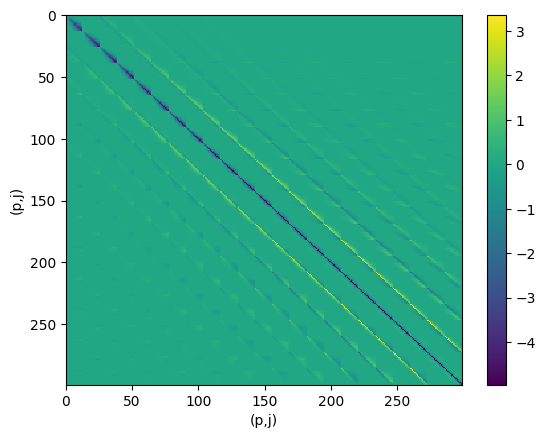

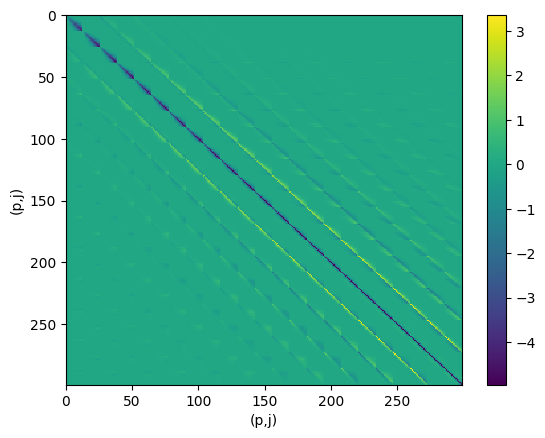

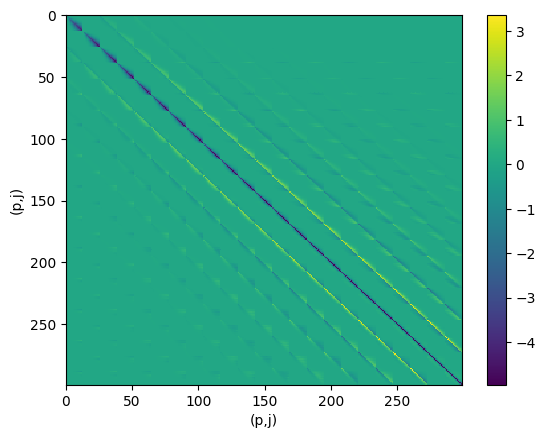

In [92]:
# trial = np.zeros(matrix_ee.shape)
# for i in range(matrix_ee.shape[0]):
#     for j in range(matrix_ee.shape[1]):
            
#             if ((abs(i-j)%12<=2 or  abs(i-j)%12 >=10 ) and abs(i-j)<27) : 
                
#                 trial[i,j] = matrix_ee[i,j]


source_folder = r'dkcoulomb.22.12.tau\dkcoulomb.22.12.sigma.5.45e-04.tau.1'
destination_folder = r'only_peak_wind_22.12.sigma.5.45\dkcoulomb.22.12.sigma.5.45e-04.tau.1'

for m in np.arange(12):

    shutil.copytree(source_folder, destination_folder)

    filename = 'only_peak_wind_22.12.sigma.5.45\dkcoulomb.22.12.sigma.5.45e-04.tau.1/self.h5'
    with h5.File(filename, 'r+') as file:
    # Dump the content hierarchy
        fn.dump_h5(file)

        data_group = file['Caapj']

        # Select the matrix for electrons-electrons collisions
        matrix_ee = np.array(data_group['Ceepj'])
    
        trial_ee = np.zeros(matrix_ee.shape)
        for i in range(matrix_ee.shape[0]):
            for j in range(matrix_ee.shape[1]):
                if (abs(i-j)%25<=m or  abs(i-j)%25 > 25 - m ):
                    trial_ee[i,j] = matrix_ee[i,j]

        trial_err = 0
        iters = 100
        for _ in range(iters):
            coeff = np.random.rand(matrix_ee.shape[1])
            sol = matrix_ee@coeff
            sol_trial = trial_ee@coeff
            trial_err += np.linalg.norm(sol - sol_trial)/np.linalg.norm(sol)/iters


        print(trial_err)
        print(np.count_nonzero(trial_ee), np.count_nonzero(matrix_ee))

        plt.figure()
        plt.pcolor(trial_ee)
        plt.xlabel('(p,j)')
        plt.ylabel('(p,j)')
        plt.gca().invert_yaxis()
        plt.colorbar()
        print(matrix_ee.shape)

        file['Caapj']['Ceepj'].write_direct(trial_ee)
        
    file.close()

    old_name = 'only_peak_wind_22.12.sigma.5.45\dkcoulomb.22.12.sigma.5.45e-04.tau.1'
    new_name = f'only_peak_wind_22.12.sigma.5.45/22.12.sigma.5.45e-04.tau.1.onl.glob.{m}'
    os.rename(old_name, new_name)

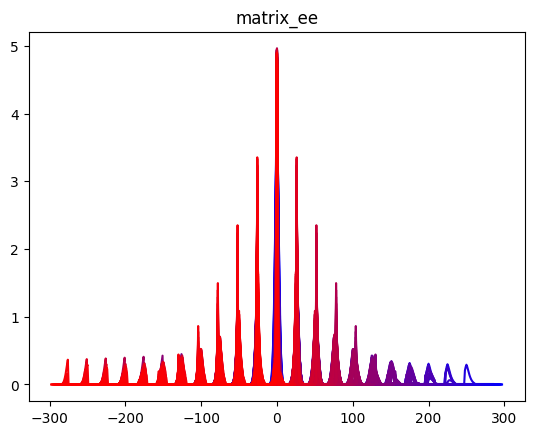

In [72]:
red = np.array([1,0,0])
blue = np.array([0,0,1])

# m = 17 +11*24
# trial_ee = np.zeros(matrix_ee.shape)
# for i in range(matrix_ee.shape[0]):
#     for j in range(matrix_ee.shape[1]):
#         if (abs(i-j)<m) : 
            
#             trial_ee[i,j] = matrix_ee[i,j]

#f = lambda x: 1/np.sqrt(2*np.pi*270)*np.exp(-x**2/(2*270))
for i in range (1, trial_ee.shape[0]):
    magnitude = np.linalg.norm(abs(trial_ee[i,:]))
    relevance = abs(trial_ee[i,:])
    plt.plot(np.arange(0,trial_ee.shape[0]) - i, relevance, label = '{}'.format(i), color = (1-i/trial_ee.shape[0])*blue + i/trial_ee.shape[0]*(red))
    plt.title('matrix_ee')
   # plt.legend()
    #plt.plot(np.linspace(-60,60,400), 175*f(np.linspace(-60,60,400)), 'o')
plt.savefig('relevance_ee.eps', format = 'eps')
plt.show()

In [169]:
m = 1

trial_ee = np.zeros(matrix_ee.shape)
for i in range(matrix_ee.shape[0]):
    for j in range(matrix_ee.shape[1]):
        if (abs(i-j)%25<=m or  abs(i-j)%25 >= 25 - m ):
            trial_ee[i,j] = matrix_ee[i,j]

trial_err = 0
iters = 100
for _ in range(iters):
    coeff = np.random.rand(matrix_ee.shape[1])
    sol = matrix_ee@coeff
    sol_trial = trial_ee@coeff
    trial_err += np.linalg.norm(sol - sol_trial)/np.linalg.norm(sol)/iters

print(trial_err)
print(np.count_nonzero(trial_ee), np.count_nonzero(matrix_ee))

0.29943383134191287
7250 43066


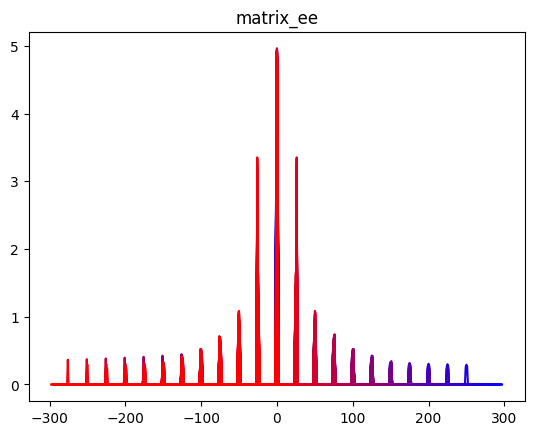

(598,)


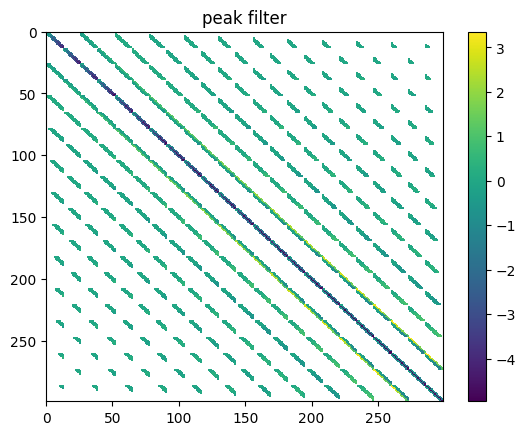

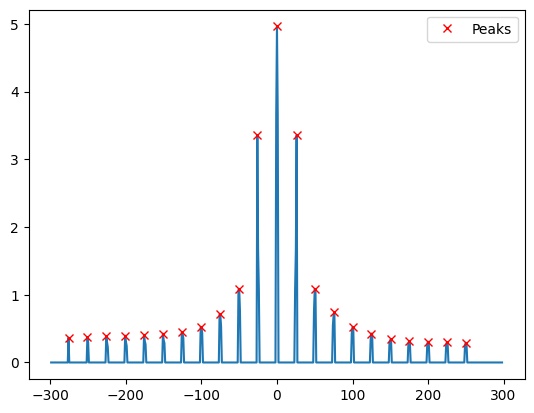

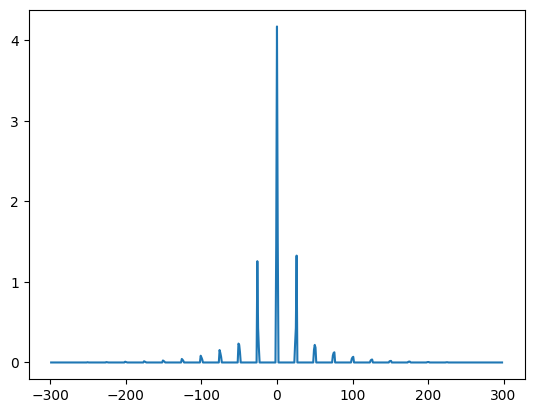

In [171]:
red = np.array([1,0,0])
blue = np.array([0,0,1])

# m = 17 +11*24
# trial_ee = np.zeros(matrix_ee.shape)
# for i in range(matrix_ee.shape[0]):
#     for j in range(matrix_ee.shape[1]):
#         if (abs(i-j)<m) : 
            
#             trial_ee[i,j] = matrix_ee[i,j]

#f = lambda x: 1/np.sqrt(2*np.pi*270)*np.exp(-x**2/(2*270))
for i in range (1, trial_ee.shape[0]):
    magnitude = np.linalg.norm(abs(trial_ee[i,:]))
    relevance = abs(trial_ee[i,:])
    plt.plot(np.arange(0,trial_ee.shape[0]) - i, relevance, label = '{}'.format(i), color = (1-i/trial_ee.shape[0])*blue + i/trial_ee.shape[0]*(red))
    plt.title('matrix_ee')
   # plt.legend()
    #plt.plot(np.linspace(-60,60,400), 175*f(np.linspace(-60,60,400)), 'o')
plt.savefig('relevance_ee.eps', format = 'eps')
plt.show()

contour = np.zeros([matrix_ee.shape[0], 2*matrix_ee.shape[1]])

for i in range(trial_ee.shape[0]):
    contour[i,(trial_ee.shape[0] - i) : (2*trial_ee.shape[0] - i  )] = abs(trial_ee[i,:])

plot = deepcopy(trial_ee)
plot[abs(plot)<=0.0] = np.nan
plt.figure()
plt.pcolor(plot)
plt.title('peak filter' )
plt.gca().invert_yaxis()
plt.colorbar()
sum = np.sum(contour, axis = 0)
contour = np.max(contour, axis = 0)
plt.figure()
plt.plot(np.arange(2*matrix_ee.shape[0]) - matrix_ee.shape[0], contour)

print(contour.shape)
x = (np.arange(2*matrix_ee.shape[0]) - matrix_ee.shape[0])
peaks, _ = find_peaks(contour, prominence = 0.28)
plt.plot(x[peaks], contour[peaks], 'rx', label='Peaks')
plt.legend()
plt.show()
plt.plot(x, sum/matrix_ee.shape[0])

> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - rows_eF ('title')
 - rows_eT ('title')
> files
 - inputs ()
0.7410953660429668
3433 42913
> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - rows_eF ('title')
 - rows_eT ('title')
> files
 - inputs ()
0.45589398737367987
9781 42913
> Ceipj
 - CeipjF ('EBACK', 'Jmaxe', 'Jmaxi', 'NCPU', 'Pmaxe', 'Pmaxi', 'kperp', 'model', 'neFLR', 'niFLR', 'nu', 'sigmaei', 'system_clock', 'tauie', 'title')
 - CeipjT ('ETEST', 'Jmaxe', 'Jmax

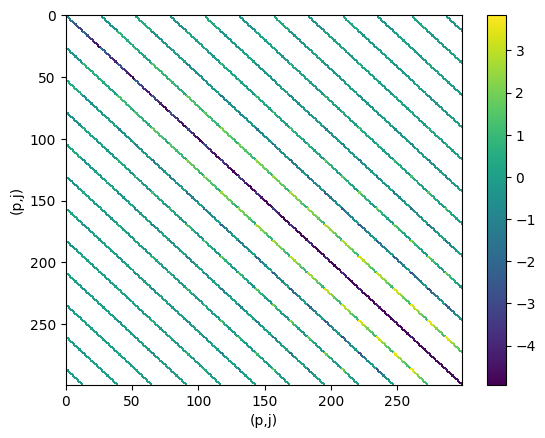

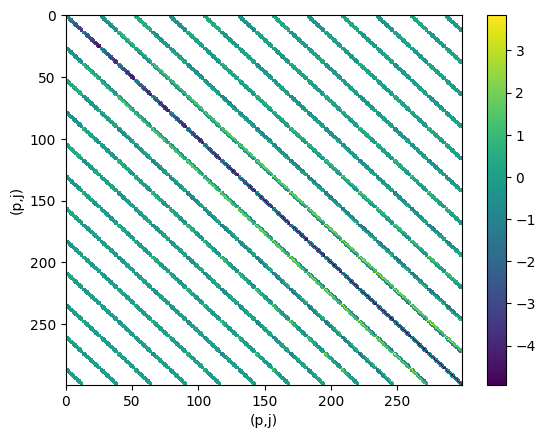

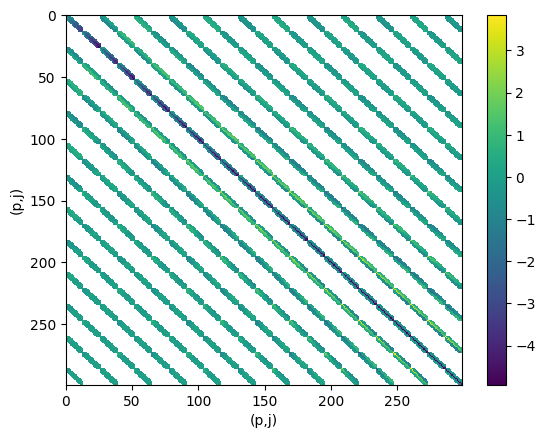

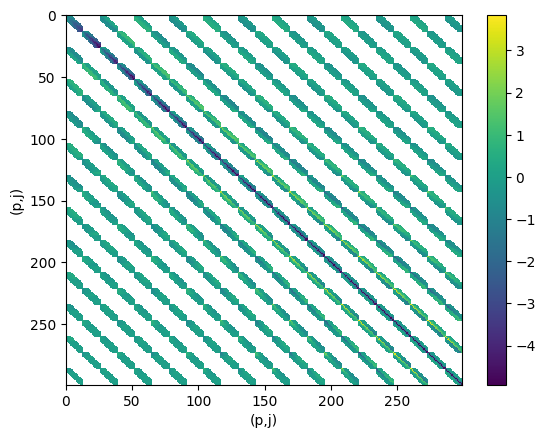

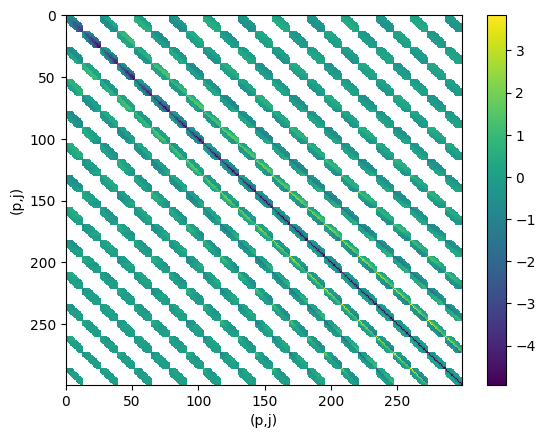

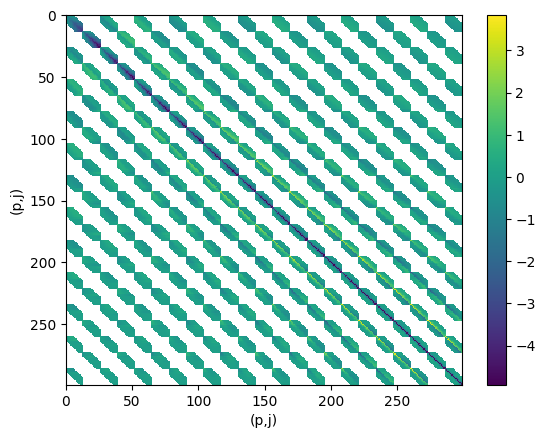

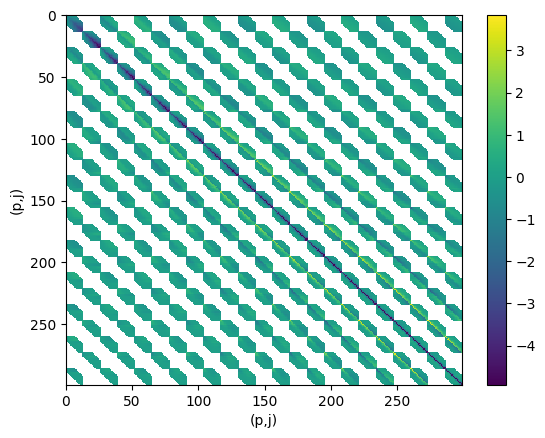

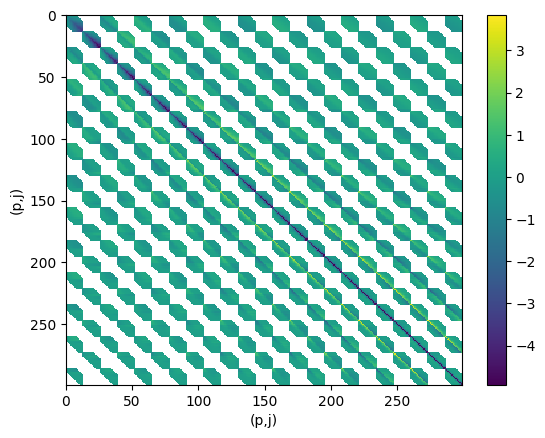

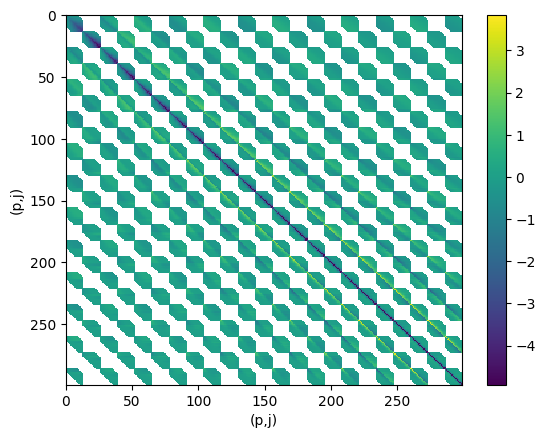

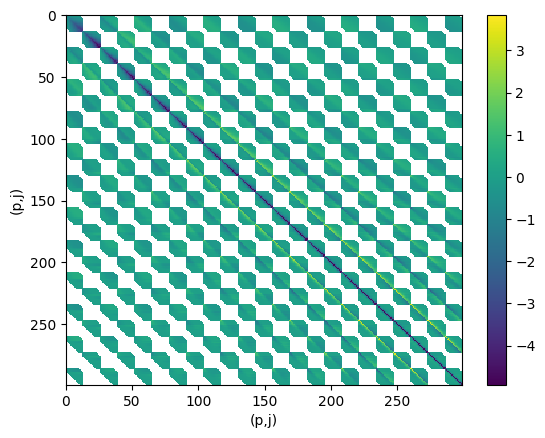

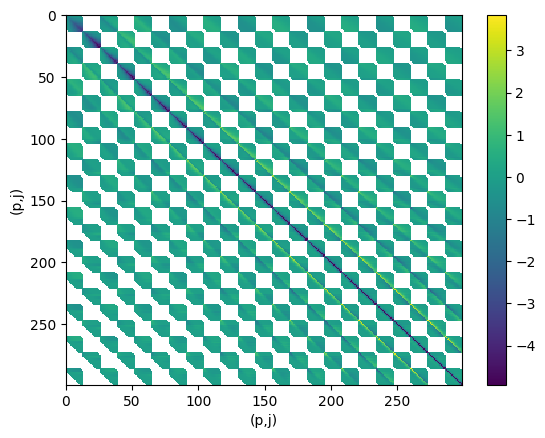

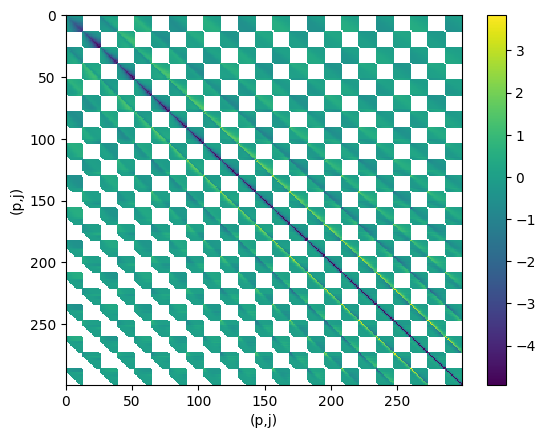

In [10]:

source_folder = r'C:\Users\anton\Downloads\sigma_scan\dkcoulomb.22.12.sigma.5.45e-04.tau.1'
destination_folder = r'ei_approx_real_sigma_peak/dkcoulomb.22.12.sigma.5.45e-04.tau.1'

for m in np.arange(12):

    shutil.copytree(source_folder, destination_folder)

    filename = 'ei_approx_real_sigma_peak/dkcoulomb.22.12.sigma.5.45e-04.tau.1/ei.h5'
    with h5.File(filename, 'r+') as file:
    # Dump the content hierarchy
        fn.dump_h5(file)

        data_group = file['Ceipj']

        # Select the matrix for electrons-electrons collisions
        matrix_ee = np.array(data_group['CeipjT'])
    
        trial_ee = np.zeros(matrix_ee.shape)
        for i in range(matrix_ee.shape[0]):
            for j in range(matrix_ee.shape[1]):
                if ( abs(i-j)%26<=m or  abs(i-j)%26 >=26 - m ):
                    trial_ee[i,j] = matrix_ee[i,j]

        trial_err = 0
        iters = 100
        for _ in range(iters):
            coeff = np.random.rand(matrix_ee.shape[1])
            sol = matrix_ee@coeff
            sol_trial = trial_ee@coeff
            trial_err += np.linalg.norm(sol - sol_trial)/np.linalg.norm(sol)/iters
    

        print(trial_err)
        print(np.count_nonzero(trial_ee), np.count_nonzero(matrix_ee))

        trial_cop = deepcopy(trial_ee)
        trial_cop[abs(trial_cop)<=0] = np.nan
        plt.figure()
        plt.pcolor(trial_cop)
        plt.xlabel('(p,j)')
        plt.ylabel('(p,j)')
        plt.gca().invert_yaxis()
        plt.colorbar()

        file['Ceipj']['CeipjT'].write_direct(trial_ee)
        
    file.close()

    old_name = r'ei_approx_real_sigma_peak/dkcoulomb.22.12.sigma.5.45e-04.tau.1'
    new_name = f'ei_approx_real_sigma_peak/22.12.sigma.5.45e-04.tau.1.peak{m}'
    os.rename(old_name, new_name)